# Import libraries

In [1165]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Redbull palette

In [1166]:
redbull_colors = ['#00174C', '#FF004C', '#FFCC00', '#CCCCCC', '#003773']
redbull_palette = sns.color_palette(redbull_colors)
redbull_palette

[(0.0, 0.09019607843137255, 0.2980392156862745),
 (1.0, 0.0, 0.2980392156862745),
 (1.0, 0.8, 0.0),
 (0.8, 0.8, 0.8),
 (0.0, 0.21568627450980393, 0.45098039215686275)]

# Global vars

In [1167]:
# path where the csv files are saved
DATA_FOLDER = '/Users/luisalcala/Desktop/redbull/data'
N_TEAMS_SEASON = 18

# EDA Standings

## Load clean file

In [1168]:
standings_df_clean = pd.read_csv(os.path.join(DATA_FOLDER, 'clean_full_standings.csv'))
standings_df_clean.head()

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
0,1,Bayern Munich,17,13,2,2,17,13,2,2,34,26,4,4,100,32,68,82,2019,76.50
1,2,Borussia Dortmund,17,11,3,3,17,10,3,4,34,21,6,7,84,41,43,69,2019,75.00
2,3,RB Leipzig,17,7,8,2,17,11,4,2,34,18,12,4,81,37,44,66,2019,72.00
3,4,Borussia Mönchengladbach,17,12,2,3,17,8,3,6,34,20,5,9,66,40,26,65,2019,71.25
4,5,Bayer 04 Leverkusen,17,9,4,4,17,10,2,5,34,19,6,9,61,44,17,63,2019,70.00


In [1169]:
standings_df_clean.dtypes

final_standing               int64
team_name                   object
home_played                  int64
home_wins                    int64
home_draws                   int64
home_losses                  int64
away_played                  int64
away_wins                    int64
away_draws                   int64
away_losses                  int64
total_played                 int64
total_wins                   int64
total_draws                  int64
total_losses                 int64
goals_in_favor               int64
goals_against                int64
goals_balance                int64
points                       int64
season_id                    int64
final_standing_earnings    float64
dtype: object

## Available seasons

In [1170]:
print(f"Number of unique seasons: {standings_df_clean['season_id'].nunique()}")
print(f"Available seasons: {standings_df_clean['season_id'].unique()}")

Number of unique seasons: 5
Available seasons: [2019 2020 2021 2022 2023]


In [1171]:
unique_seasons = standings_df_clean['season_id'].unique()

## Teams per season

In [1172]:
print(f"Total teams: {standings_df_clean['team_name'].nunique()}")
print(f"Distinct teams: {standings_df_clean['team_name'].unique()}")

Total teams: 24
Distinct teams: ['Bayern Munich' 'Borussia Dortmund' 'RB Leipzig'
 'Borussia Mönchengladbach' 'Bayer 04 Leverkusen' '1899 Hoffenheim'
 'VfL Wolfsburg' 'SC Freiburg' 'Eintracht Frankfurt' 'Hertha Berlin'
 'FC Union Berlin' 'FC Schalke 04' 'Mainz 05' 'FC Köln' 'FC Augsburg'
 'Werder Bremen' 'Fortuna Düsseldorf' 'SC Paderborn 07' 'VfB Stuttgart'
 'Arminia Bielefeld' 'VfL Bochum' 'Greuther Fürth' 'FC Heidenheim'
 'Darmstadt 98']


In [1173]:
standings_df_clean[standings_df_clean['season_id']==2019]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig',
       'Borussia Mönchengladbach', 'Bayer 04 Leverkusen',
       '1899 Hoffenheim', 'VfL Wolfsburg', 'SC Freiburg',
       'Eintracht Frankfurt', 'Hertha Berlin', 'FC Union Berlin',
       'FC Schalke 04', 'Mainz 05', 'FC Köln', 'FC Augsburg',
       'Werder Bremen', 'Fortuna Düsseldorf', 'SC Paderborn 07'],
      dtype=object)

In [1174]:
standings_df_clean[standings_df_clean['season_id']==2020]['team_name'].unique()

array(['Bayern Munich', 'RB Leipzig', 'Borussia Dortmund',
       'VfL Wolfsburg', 'Eintracht Frankfurt', 'Bayer 04 Leverkusen',
       'FC Union Berlin', 'Borussia Mönchengladbach', 'VfB Stuttgart',
       'SC Freiburg', '1899 Hoffenheim', 'Mainz 05', 'FC Augsburg',
       'Hertha Berlin', 'Arminia Bielefeld', 'FC Köln', 'Werder Bremen',
       'FC Schalke 04'], dtype=object)

In [1175]:
standings_df_clean[standings_df_clean['season_id']==2021]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'RB Leipzig', 'FC Union Berlin', 'SC Freiburg', 'FC Köln',
       'Mainz 05', '1899 Hoffenheim', 'Borussia Mönchengladbach',
       'Eintracht Frankfurt', 'VfL Wolfsburg', 'VfL Bochum',
       'FC Augsburg', 'VfB Stuttgart', 'Hertha Berlin',
       'Arminia Bielefeld', 'Greuther Fürth'], dtype=object)

In [1176]:
standings_df_clean[standings_df_clean['season_id']==2022]['team_name'].unique()

array(['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig',
       'FC Union Berlin', 'SC Freiburg', 'Bayer 04 Leverkusen',
       'Eintracht Frankfurt', 'VfL Wolfsburg', 'Mainz 05',
       'Borussia Mönchengladbach', 'FC Köln', '1899 Hoffenheim',
       'Werder Bremen', 'VfL Bochum', 'FC Augsburg', 'VfB Stuttgart',
       'FC Schalke 04', 'Hertha Berlin'], dtype=object)

In [1177]:
standings_df_clean[standings_df_clean['season_id']==2023]['team_name'].unique()

array(['Bayer 04 Leverkusen', 'VfB Stuttgart', 'Bayern Munich',
       'RB Leipzig', 'Borussia Dortmund', 'Eintracht Frankfurt',
       '1899 Hoffenheim', 'FC Heidenheim', 'Werder Bremen', 'SC Freiburg',
       'FC Augsburg', 'VfL Wolfsburg', 'Mainz 05',
       'Borussia Mönchengladbach', 'FC Union Berlin', 'VfL Bochum',
       'FC Köln', 'Darmstadt 98'], dtype=object)

In [1178]:
unique_teams = standings_df_clean['team_name'].unique()

In [1179]:
standings_df_clean[standings_df_clean['team_name']=='RB Leipzig']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
2,3,RB Leipzig,17,7,8,2,17,11,4,2,34,18,12,4,81,37,44,66,2019,72.00
19,2,RB Leipzig,17,11,4,2,17,8,4,5,34,19,8,7,60,32,28,65,2020,75.00
39,4,RB Leipzig,17,11,2,4,17,6,5,6,34,17,7,10,72,37,35,58,2021,71.25
56,3,RB Leipzig,17,13,2,2,17,7,4,6,34,20,6,8,64,41,23,66,2022,72.00
75,4,RB Leipzig,17,11,4,2,17,8,4,5,34,19,8,7,77,39,38,65,2023,71.25


## Top 5 each season

In [1180]:
for season in unique_seasons:
    print(season)
    print(standings_df_clean[standings_df_clean['season_id']==season][['final_standing', 'team_name']].head(5).values)

2019
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'RB Leipzig']
 [4 'Borussia Mönchengladbach']
 [5 'Bayer 04 Leverkusen']]
2020
[[1 'Bayern Munich']
 [2 'RB Leipzig']
 [3 'Borussia Dortmund']
 [4 'VfL Wolfsburg']
 [5 'Eintracht Frankfurt']]
2021
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'Bayer 04 Leverkusen']
 [4 'RB Leipzig']
 [5 'FC Union Berlin']]
2022
[[1 'Bayern Munich']
 [2 'Borussia Dortmund']
 [3 'RB Leipzig']
 [4 'FC Union Berlin']
 [5 'SC Freiburg']]
2023
[[1 'Bayer 04 Leverkusen']
 [2 'VfB Stuttgart']
 [3 'Bayern Munich']
 [4 'RB Leipzig']
 [5 'Borussia Dortmund']]


## Search specifics

In [1181]:
standings_df_clean[standings_df_clean['team_name']=='VfL Wolfsburg']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
6,7,VfL Wolfsburg,17,4,7,6,17,9,3,5,34,13,10,11,48,46,2,49,2019,65.60
21,4,VfL Wolfsburg,17,10,4,3,17,7,6,4,34,17,10,7,61,37,24,61,2020,71.25
47,12,VfL Wolfsburg,17,7,3,7,17,5,3,9,34,12,6,16,43,54,-11,42,2021,53.40
61,8,VfL Wolfsburg,17,6,7,4,17,7,3,7,34,13,10,11,57,48,9,49,2022,63.50
83,12,VfL Wolfsburg,17,6,4,7,17,4,3,10,34,10,7,17,41,56,-15,37,2023,53.40


## Total appearances of each team

Total seasons: 5

In [1182]:
df_team_count = pd.DataFrame(standings_df_clean['team_name'].value_counts()).reset_index()
df_team_count

,team_name,count
0,Bayern Munich,5
1,SC Freiburg,5
2,FC Augsburg,5
3,FC Köln,5
4,Borussia Dortmund,5
5,FC Union Berlin,5
6,Eintracht Frankfurt,5
7,Mainz 05,5
8,VfL Wolfsburg,5
9,1899 Hoffenheim,5


In [1183]:
unique_counts = df_team_count['count'].unique()
value_to_color = {
    value: redbull_colors[i % len(redbull_colors)] for i, value in enumerate(unique_counts)
}
value_to_color

{5: '#00174C', 4: '#FF004C', 3: '#FFCC00', 2: '#CCCCCC', 1: '#003773'}

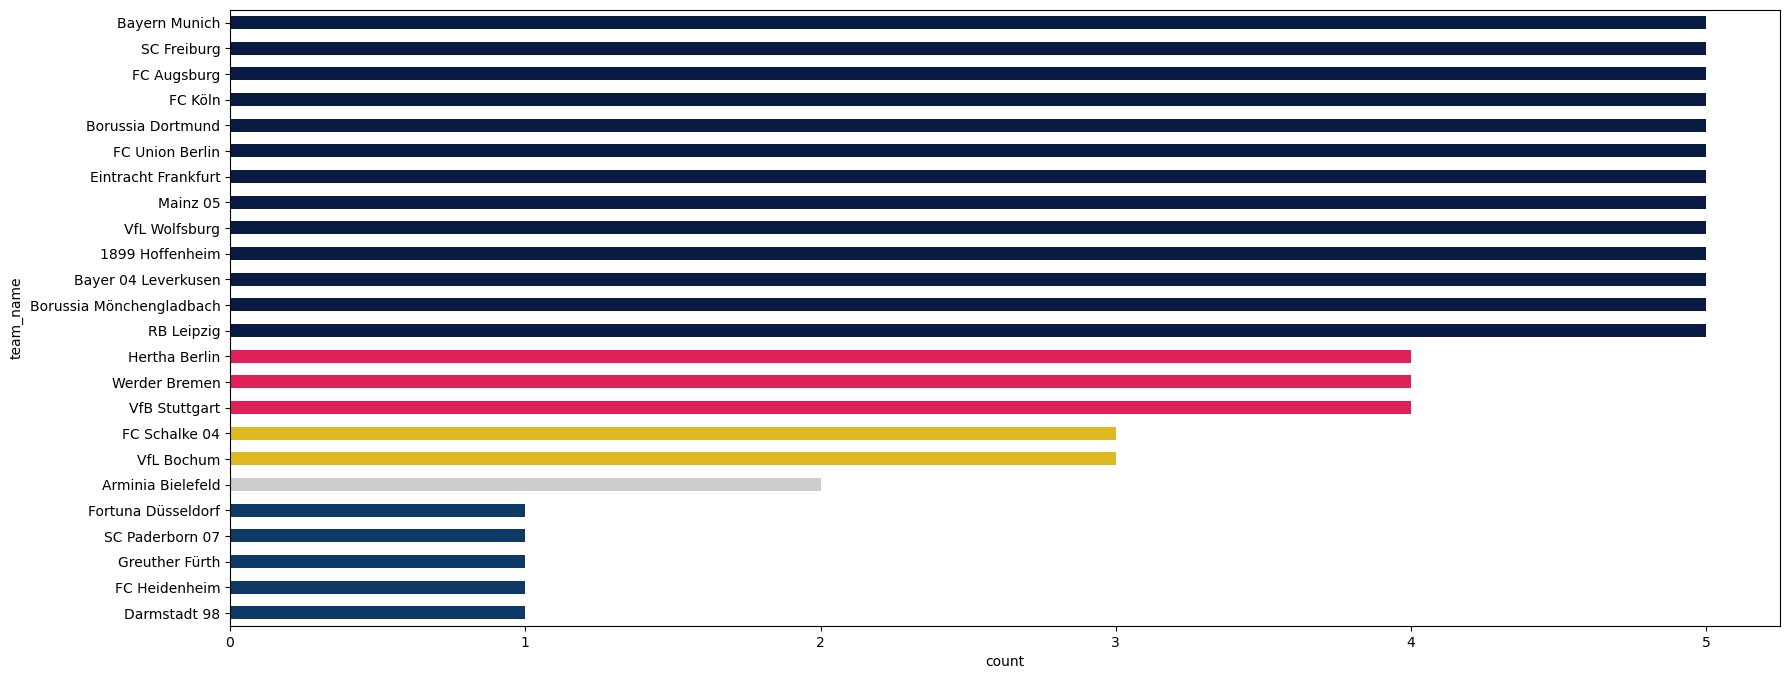

In [1184]:
plt.figure(figsize=(20,8))
sns.barplot(
    data=df_team_count,
    x='count', 
    y='team_name', 
    palette=[value_to_color[val] for val in df_team_count['count']],
    saturation=0.75,
    alpha=1,
    fill=True,
    width=0.5
)
#plt.xticks(rotation=90)
plt.show()

## Total times in top 5 and last 5 for each team

In [1185]:
d_count_top_5 = {
    team: 0 for team in unique_teams
}

for season in unique_seasons:
    for team in unique_teams:
        first_5 = standings_df_clean[standings_df_clean['season_id'] == season]['team_name'].head(5)
        d_count_top_5[team] += (first_5 == team).sum()
df_top_5 = pd.DataFrame([d_count_top_5]).T.sort_values(by=0, ascending=False).reset_index()
df_top_5.columns = ['team_name', 'n_times_top_5']
df_top_5

,team_name,n_times_top_5
0,Bayern Munich,5
1,RB Leipzig,5
2,Borussia Dortmund,5
3,Bayer 04 Leverkusen,3
4,FC Union Berlin,2
5,Borussia Mönchengladbach,1
6,VfL Wolfsburg,1
7,SC Freiburg,1
8,Eintracht Frankfurt,1
9,VfB Stuttgart,1


In [1186]:
best_consistent_5 = list(df_top_5['team_name'][:5].values)
best_consistent_5

['Bayern Munich',
 'RB Leipzig',
 'Borussia Dortmund',
 'Bayer 04 Leverkusen',
 'FC Union Berlin']

In [1187]:
d_count_last_5 = {
    team: 0 for team in unique_teams
}

for season in unique_seasons:
    for team in unique_teams:
        last_5 = standings_df_clean[standings_df_clean['season_id'] == season]['team_name'].tail(5)
        d_count_last_5[team] += (last_5 == team).sum()
df_last_5 = pd.DataFrame([d_count_last_5]).T.sort_values(by=0, ascending=False).reset_index()
df_last_5.columns = ['team_name', 'n_times_last_5']
df_last_5

,team_name,n_times_last_5
0,Hertha Berlin,3
1,FC Köln,3
2,FC Augsburg,3
3,Werder Bremen,2
4,VfL Bochum,2
5,Arminia Bielefeld,2
6,VfB Stuttgart,2
7,FC Schalke 04,2
8,Darmstadt 98,1
9,Borussia Mönchengladbach,1


In [1188]:
worst_consistent_5 = list(df_last_5['team_name'][:5].values)
worst_consistent_5

['Hertha Berlin', 'FC Köln', 'FC Augsburg', 'Werder Bremen', 'VfL Bochum']

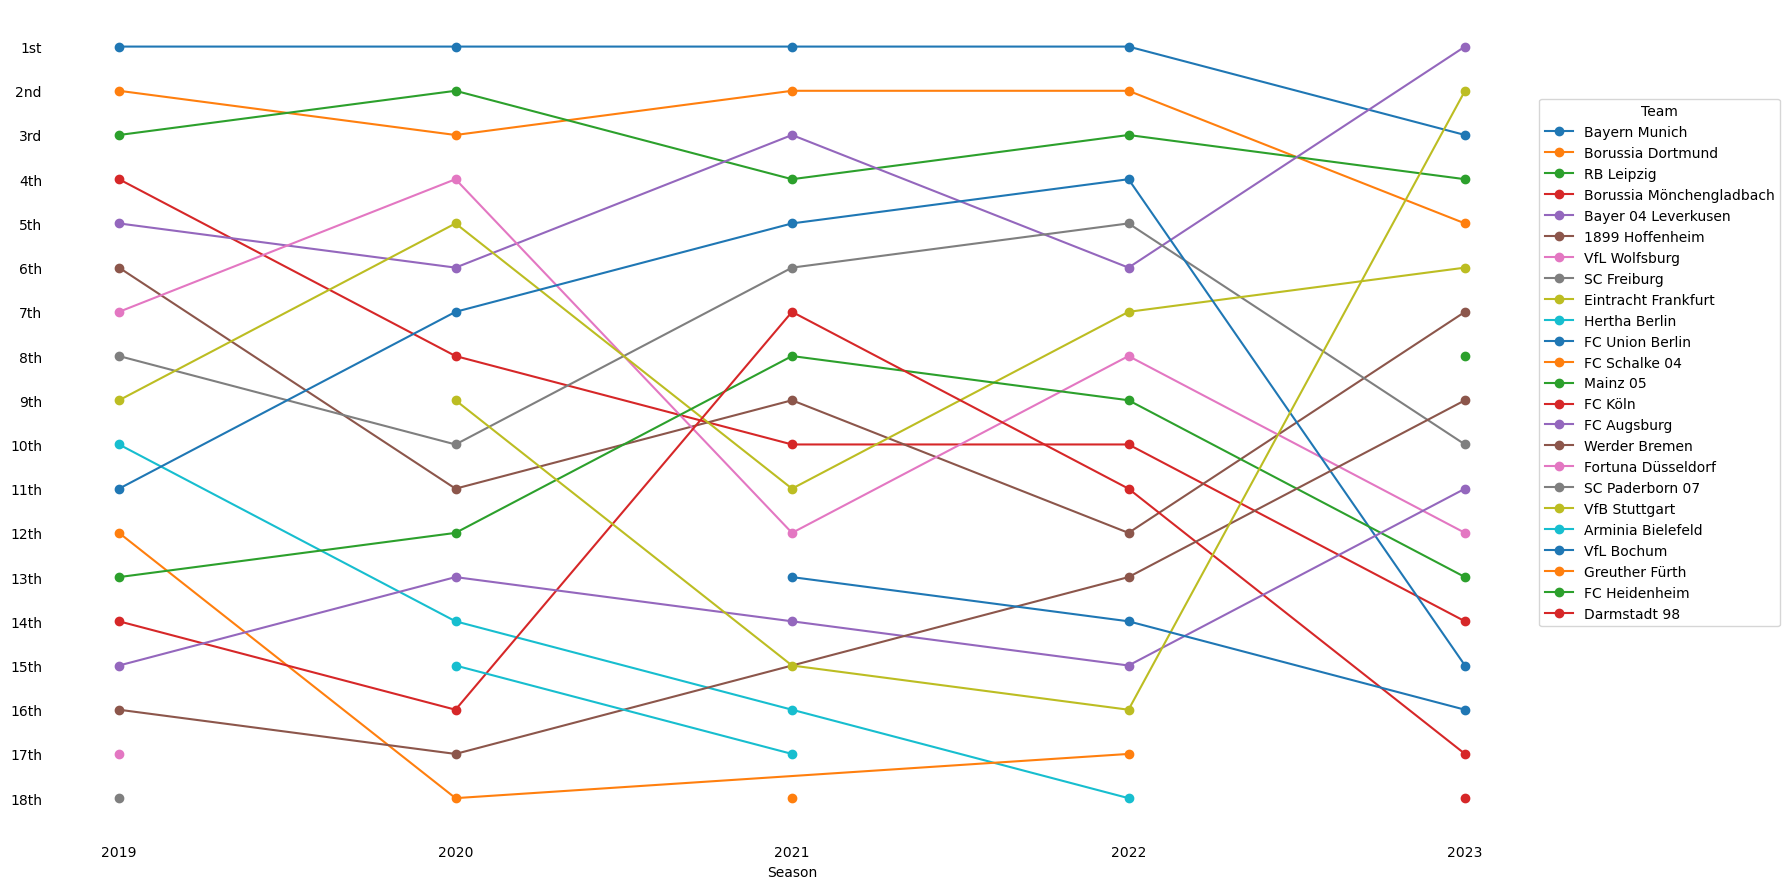

In [1189]:
plt.figure(figsize=(18,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    plt.plot(
        team_data['season_id'],
        team_data['final_standing'],
        marker='o',
        label=team
    )
plt.gca().invert_yaxis()


#plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9))
plt.xticks(unique_seasons)
plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

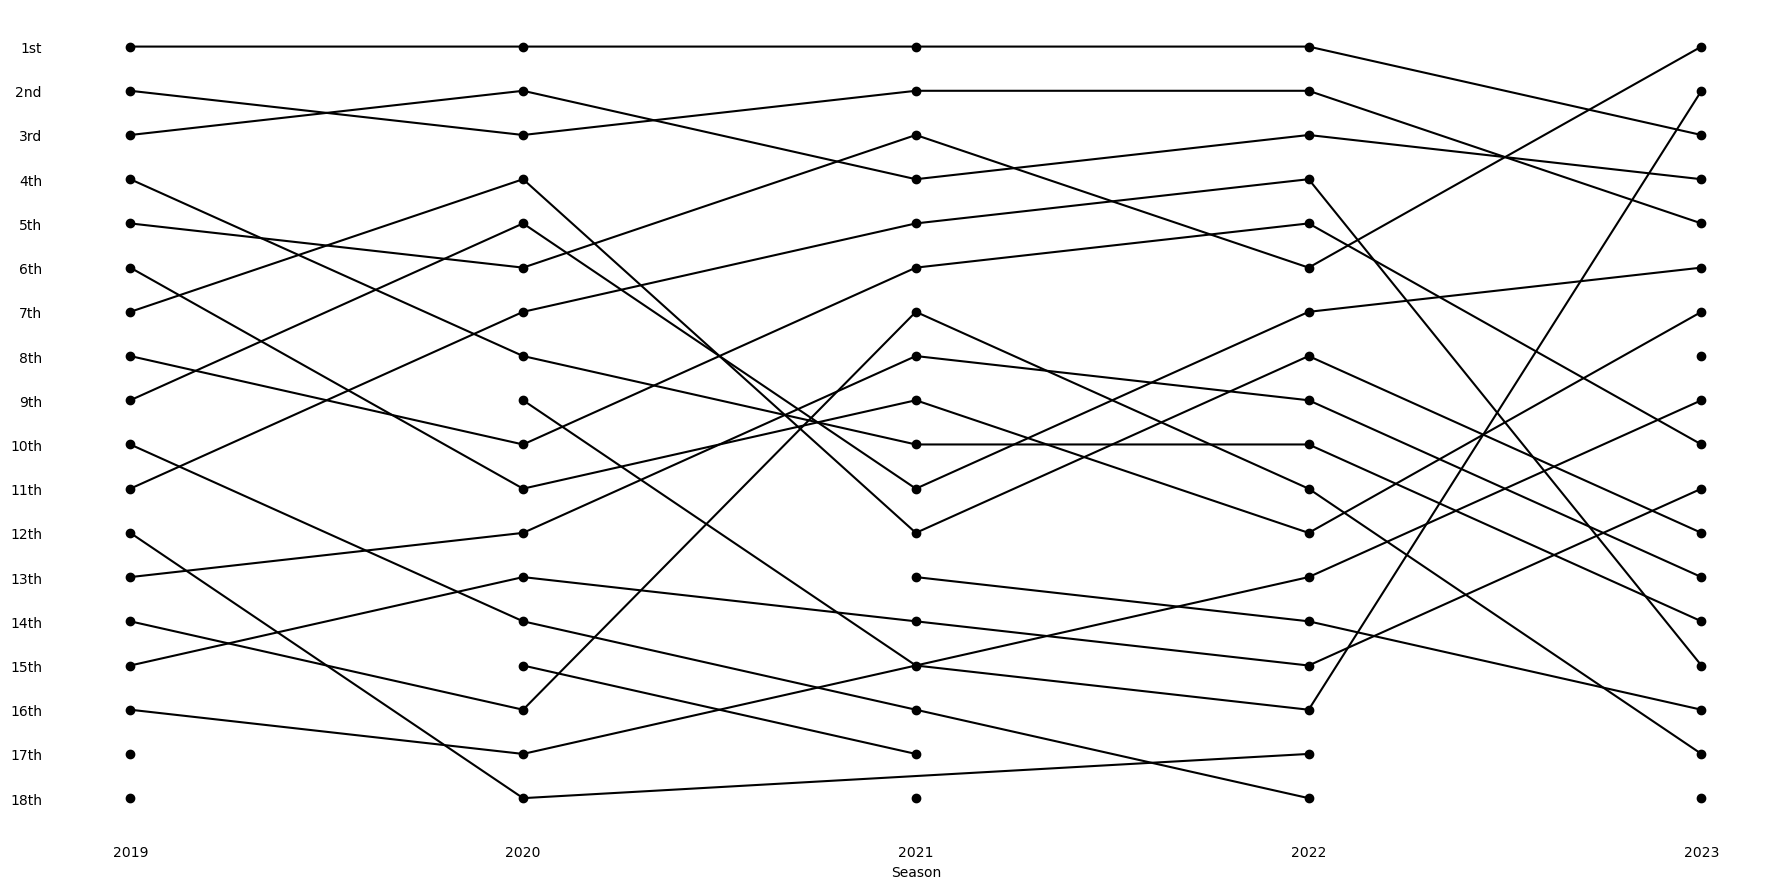

In [1190]:
plt.figure(figsize=(18,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    plt.plot(
        team_data['season_id'],
        team_data['final_standing'],
        marker='o',
        label=team,
        color = 'black'
    )
plt.gca().invert_yaxis()


#plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend().set_visible(False)
plt.xticks(unique_seasons)
plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

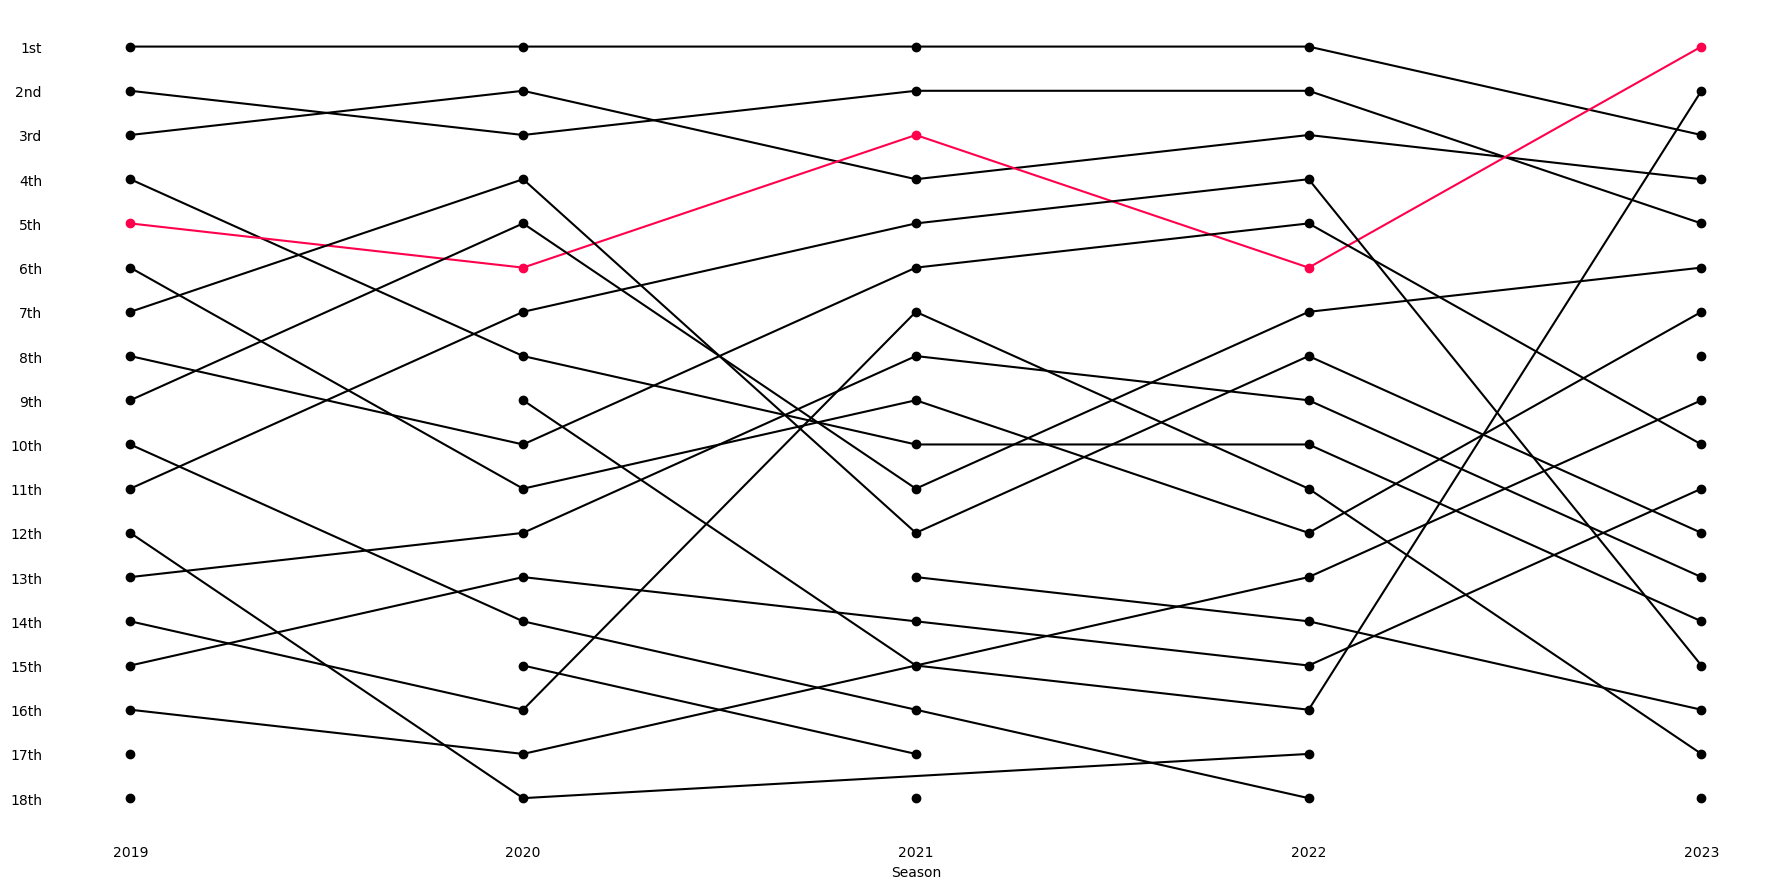

In [1191]:
principal_team = 'Bayer 04 Leverkusen'

plt.figure(figsize=(18,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    if team != principal_team:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='black'
        )
    else:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color=redbull_palette[1]
        )
plt.gca().invert_yaxis()


#plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend().set_visible(False)
plt.xticks(unique_seasons)
plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

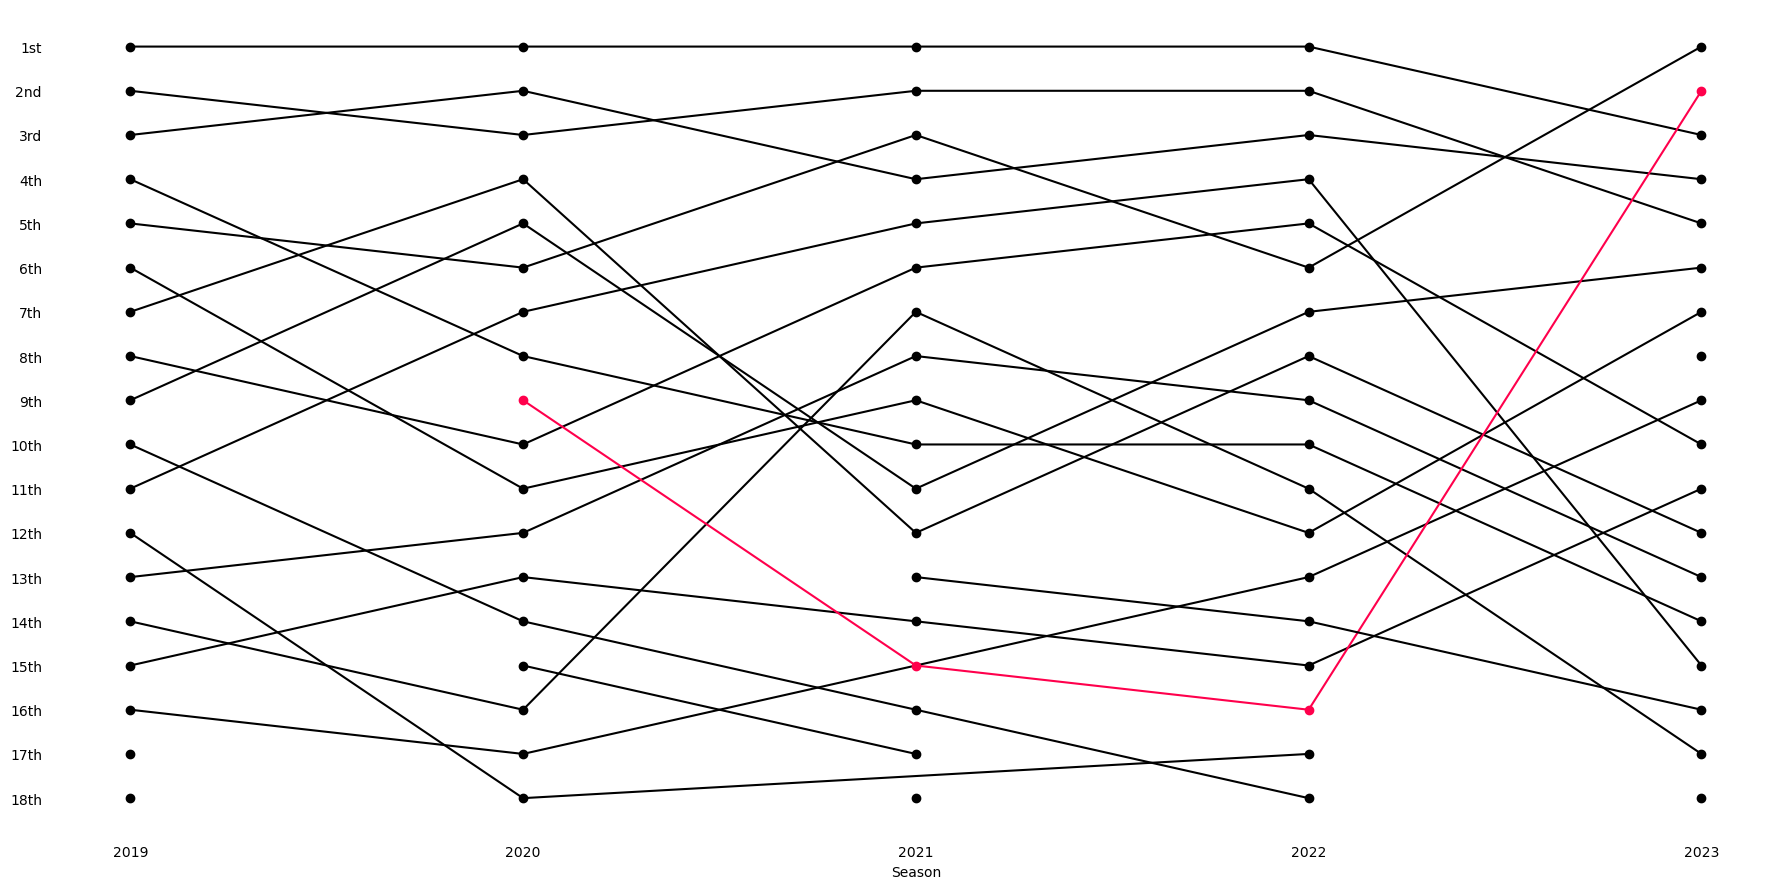

In [1192]:
principal_team = 'VfB Stuttgart'

plt.figure(figsize=(18,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    if team != principal_team:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='black'
        )
    else:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color=redbull_palette[1]
        )
plt.gca().invert_yaxis()


#plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend().set_visible(False)
plt.xticks(unique_seasons)
plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

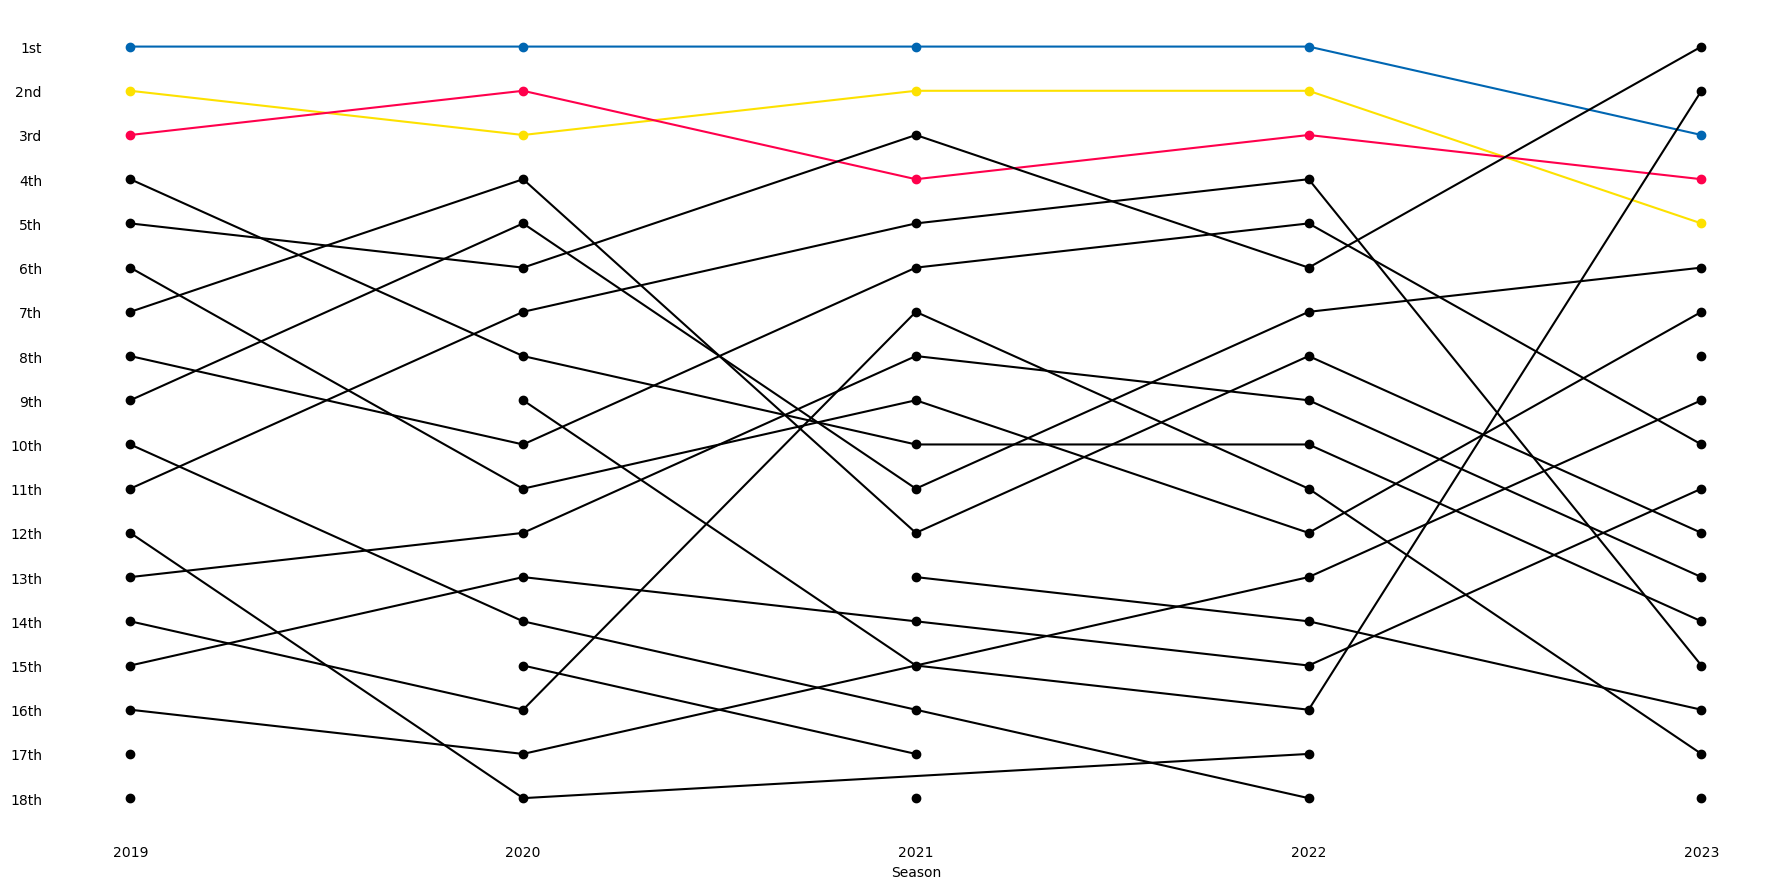

In [1193]:
t1 = 'RB Leipzig'
t2 = 'Borussia Dortmund'
t3 = 'Bayern Munich'

plt.figure(figsize=(18,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    if team == t1:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color=redbull_palette[1]
        )
    elif team == t2:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='#FDE100'
        )
    elif team == t3:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='#0066B2'
        )
    else:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='black'
        )
plt.gca().invert_yaxis()


#plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend().set_visible(False)
plt.xticks(unique_seasons)
plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

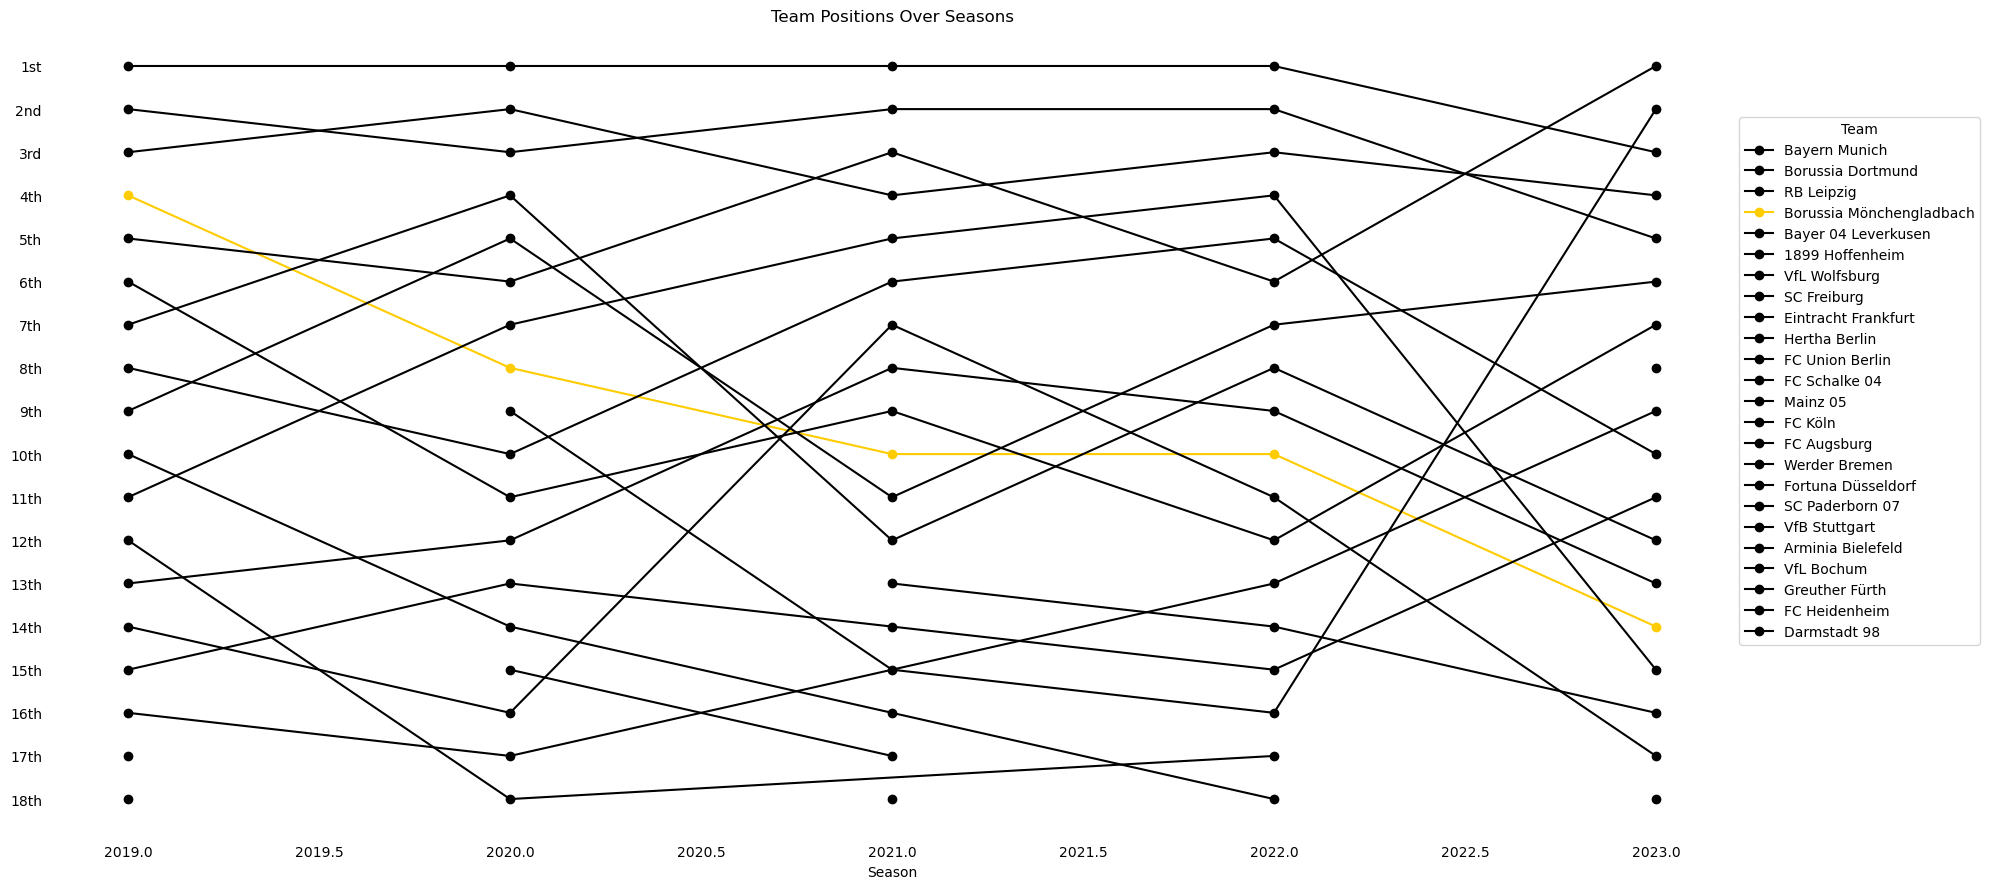

In [1194]:
principal_team = 'Borussia Mönchengladbach'

plt.figure(figsize=(20,9))

for team in unique_teams:
    team_data = standings_df_clean[standings_df_clean['team_name'] == team][['final_standing', 'season_id']]
    if team != principal_team:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color='black'
        )
    else:
        plt.plot(
            team_data['season_id'],
            team_data['final_standing'],
            marker='o',
            label=team,
            color=redbull_palette[2]
        )
plt.gca().invert_yaxis()


plt.title('Team Positions Over Seasons')
plt.xlabel('Season')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.yticks(
    list(range(1,N_TEAMS_SEASON+1)), 
    ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', 
                  '9th', '10th', '11th', '12th', '13th', '14th', '15th', 
                  '16th', '17th', '18th'] 
)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.tick_params(bottom = False, left = False) 
plt.show()

## Goals balance

In [1195]:
standings_df_clean

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
0,1,Bayern Munich,17,13,2,2,17,13,2,2,34,26,4,4,100,32,68,82,2019,76.50
1,2,Borussia Dortmund,17,11,3,3,17,10,3,4,34,21,6,7,84,41,43,69,2019,75.00
2,3,RB Leipzig,17,7,8,2,17,11,4,2,34,18,12,4,81,37,44,66,2019,72.00
3,4,Borussia Mönchengladbach,17,12,2,3,17,8,3,6,34,20,5,9,66,40,26,65,2019,71.25
4,5,Bayer 04 Leverkusen,17,9,4,4,17,10,2,5,34,19,6,9,61,44,17,63,2019,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,14,Borussia Mönchengladbach,17,5,6,6,17,2,7,8,34,7,13,14,56,67,-11,34,2023,46.00
86,15,FC Union Berlin,17,7,2,8,17,2,4,11,34,9,6,19,33,58,-25,33,2023,43.50
87,16,VfL Bochum,17,5,8,4,17,2,4,11,34,7,12,15,42,74,-32,33,2023,41.75
88,17,FC Köln,17,4,4,9,17,1,8,8,34,5,12,17,28,60,-32,27,2023,35.50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


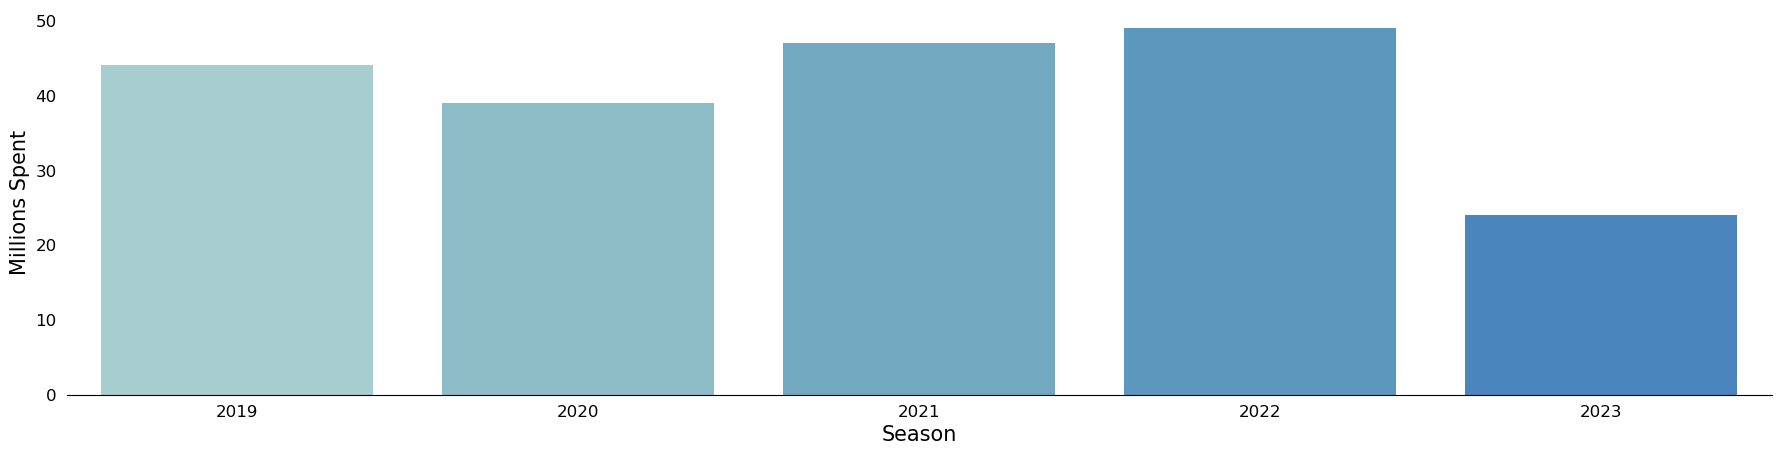

In [1196]:
plt.figure(figsize=(22,5))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=standings_df_clean[standings_df_clean['team_name']=='Bayer 04 Leverkusen'],
    x='season_id',
    y='goals_against',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend().set_visible(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


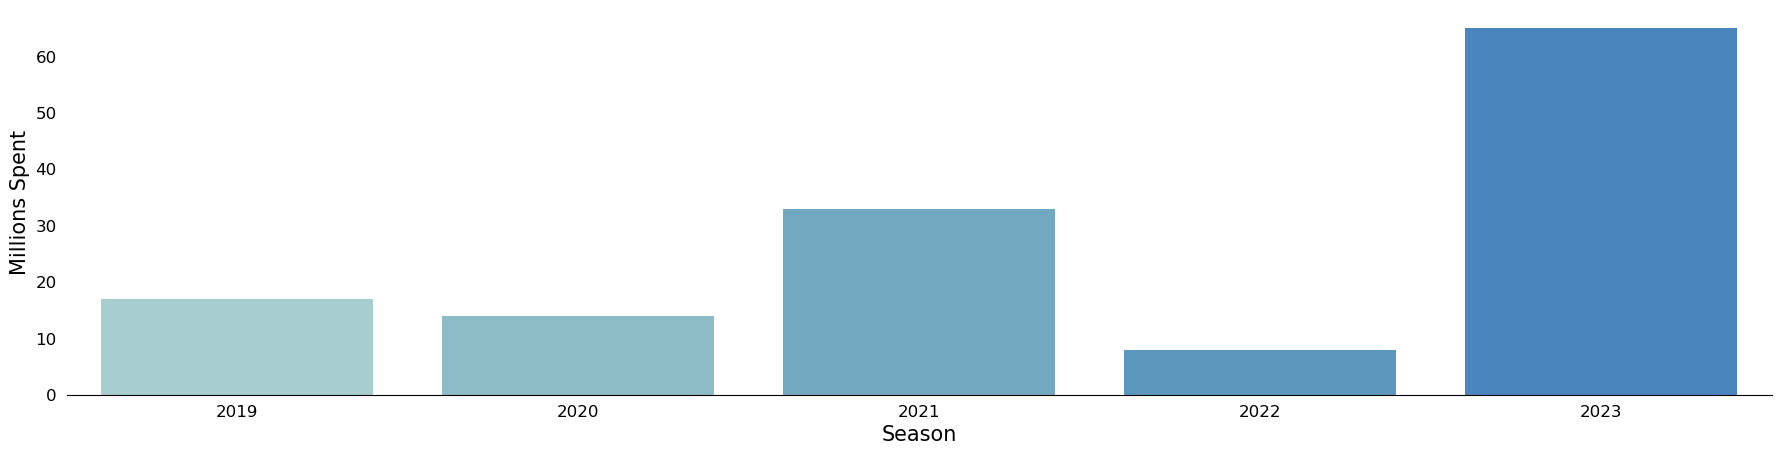

In [1197]:
plt.figure(figsize=(22,5))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=standings_df_clean[standings_df_clean['team_name']=='Bayer 04 Leverkusen'],
    x='season_id',
    y='goals_balance',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend().set_visible(False)
plt.show()

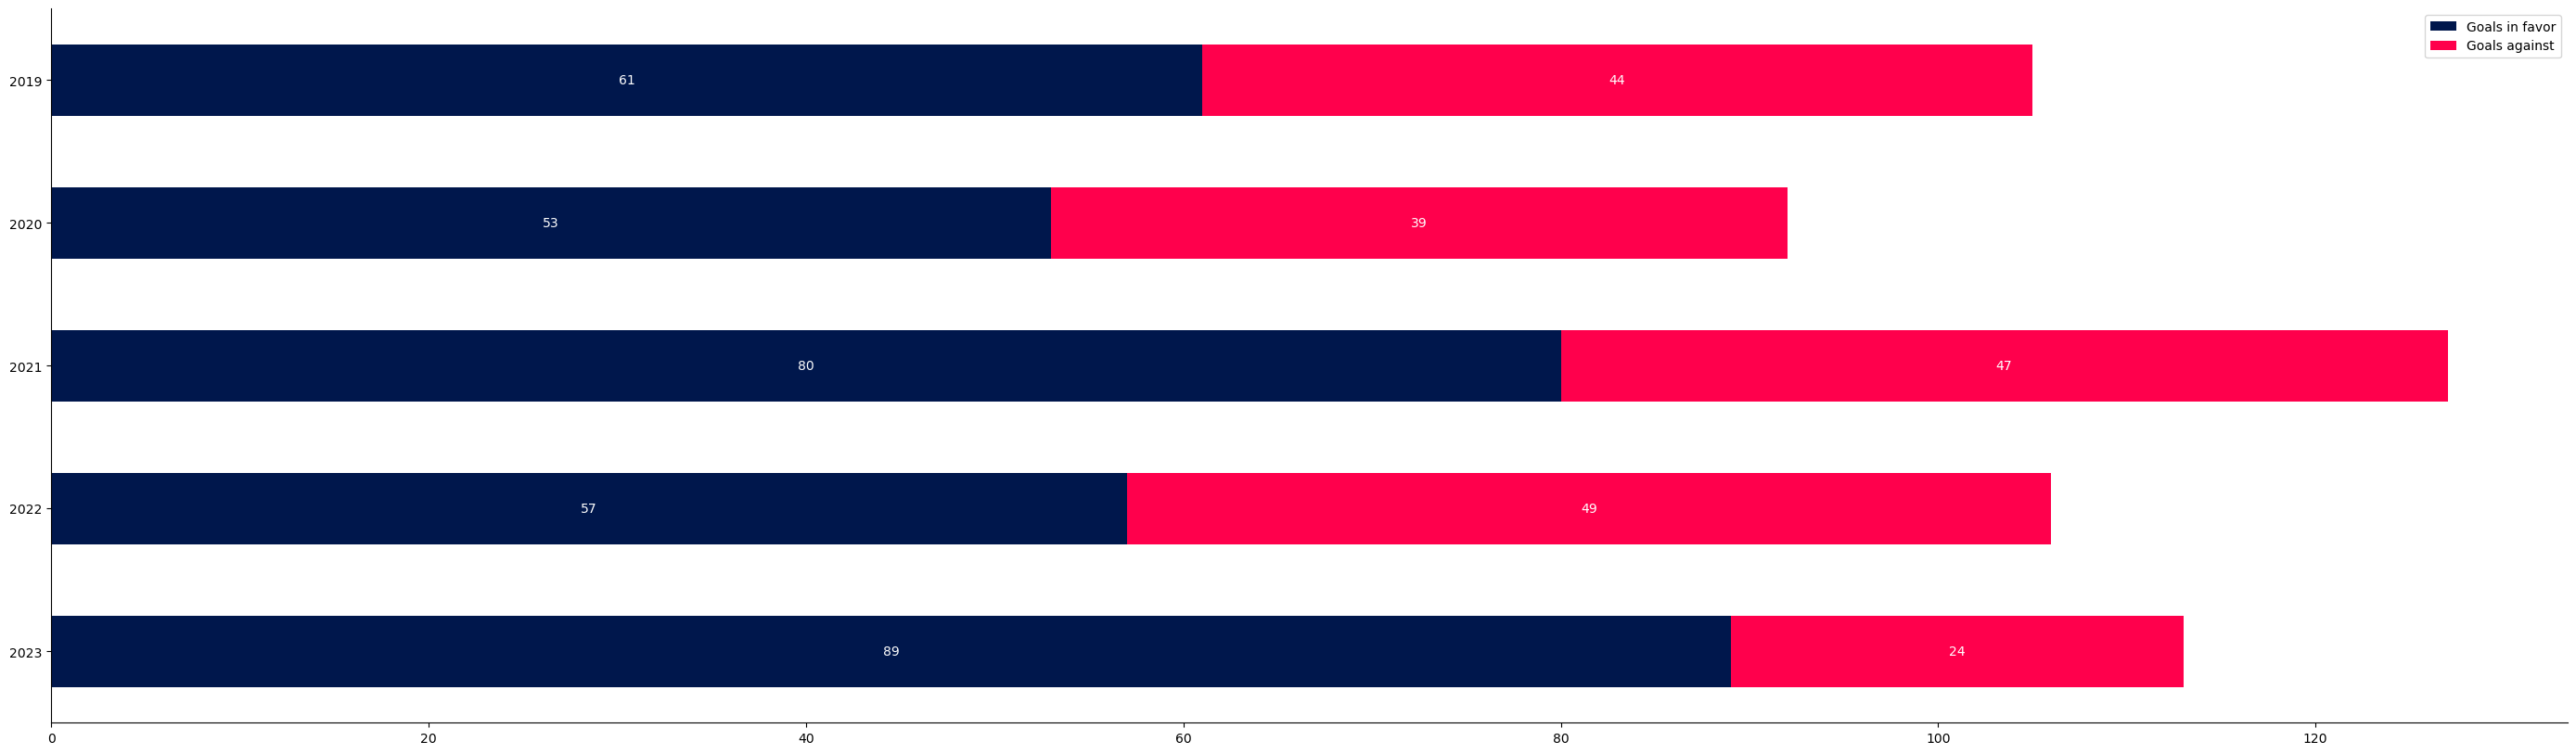

In [1255]:
df_goals_lever = standings_df_clean[standings_df_clean['team_name']=='Bayer 04 Leverkusen'][['season_id','goals_in_favor', 'goals_against']]
df_goals_lever.set_index('season_id', inplace=True)
df_goals_lever = df_goals_lever.iloc[::-1]

fig, ax = plt.subplots(1, 1, figsize=(35,10), sharex=True)

df_goals_lever.plot(kind='barh', stacked=True, color=redbull_palette, ax=ax)

ax.set_ylabel('')

ax.legend(['Goals in favor', 'Goals against'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

labels_adq = [f'{i}' for i in df_goals_lever.to_numpy().flatten(order='F')]


for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels_adq[i], (x, y), ha='center', va='center', c='white')

plt.show()

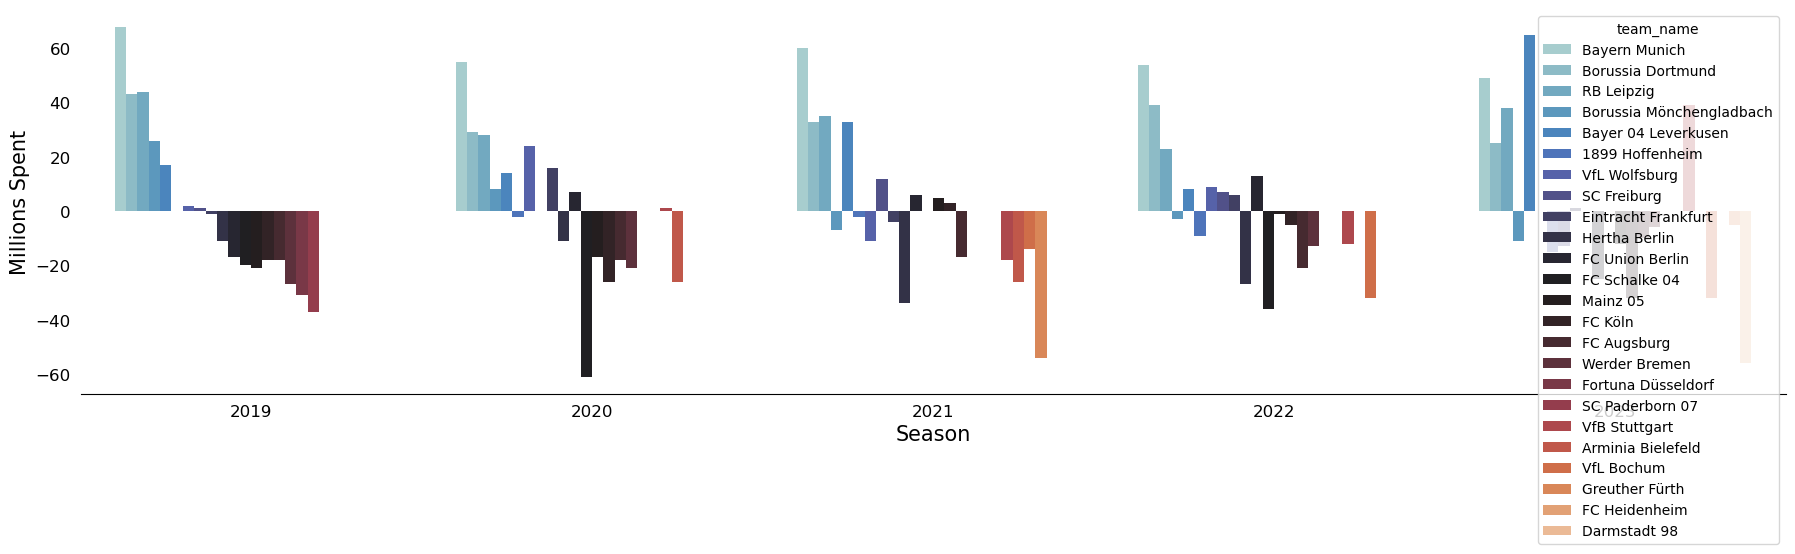

In [1198]:
plt.figure(figsize=(22,5))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=standings_df_clean,
    x='season_id',
    y='goals_balance',
    hue='team_name',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
#plt.legend().set_visible(False)
plt.show()

# EDA Transfers

## Load clean file

In [1199]:
transfers_df_clean = pd.read_csv(os.path.join(DATA_FOLDER, 'clean_transfers.csv'))
transfers_df_clean.head()

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
0,2518704,2019-07-01,free loan transfer,19/20,2019,314245,Emmanuel Iyoha,21.0,NaN,0.90,...,right,2024-02-25T02:16:17.122733,right-back,left-winger,defense,defense,attack,Germany,Nigeria,NaN
1,2472611,2019-07-01,free transfer,19/20,2019,153634,Marcel Hilßner,24.0,0.0,0.40,...,left,2024-02-24T10:13:57.036699,right-winger,left-winger,mid,attack,attack,Germany,NaN,NaN
2,2512548,2019-07-01,free loan transfer,19/20,2019,195676,Ole Käuper,22.0,NaN,0.35,...,left,2024-02-24T10:13:48.186890,central-midfield,NaN,mid,mid,NaN,Germany,NaN,NaN
3,2507880,2019-07-01,free loan transfer,19/20,2019,236986,Thore Jacobsen,22.0,NaN,0.30,...,left,2024-02-24T10:13:43.016587,central-midfield,left-back,mid,mid,defense,Germany,NaN,NaN
4,2491956,2019-07-01,transfer to no club,19/20,2019,31652,Fabian Schönheim,32.0,NaN,0.20,...,unknown,2024-02-24T23:49:23.092466,left-back,defensive-midfield,defense,defense,mid,Germany,NaN,NaN


In [1200]:
transfers_df_clean.columns

Index(['transfer_id', 'transfer_datetime', 'transfer_type', 'season',
       'season_id', 'player_id', 'player_name', 'player_age_at_transfer',
       'transfer_fee_million', 'market_value_million', 'from_club_id',
       'from_club_name', 'from_competition_id', 'from_competition_name',
       'to_club_id', 'to_club_name', 'to_competition_id',
       'to_competition_name', 'date_of_birth_datetime', 'citizenship',
       'position_main', 'position_other', 'height_cm', 'foot', 'updated_at',
       'extra_position_1', 'extra_position_2', 'position_main_segment',
       'extra_position_1_segment', 'extra_position_2_segment', 'citizenship_1',
       'citizenship_2', 'citizenship_3'],
      dtype='object')

In [1201]:
transfers_df_clean[transfers_df_clean['to_competition_id']=='L1']['to_club_name'].unique()

array(['SC Paderborn 07', 'FC Augsburg', 'FC Union Berlin', 'FC Köln',
       'Borussia Dortmund', 'Mainz 05', 'Fortuna Düsseldorf',
       'RB Leipzig', 'Bayern Munich', '1899 Hoffenheim', 'VfL Wolfsburg',
       'Borussia Mönchengladbach', 'Werder Bremen', 'Hertha Berlin',
       'FC Schalke 04', 'Bayer 04 Leverkusen', 'SC Freiburg',
       'Eintracht Frankfurt', 'Arminia Bielefeld', 'VfB Stuttgart',
       'VfL Bochum', 'Greuther Fürth', 'FC Heidenheim', 'Darmstadt 98'],
      dtype=object)

In [1202]:
transfers_df_clean[transfers_df_clean['from_competition_id']=='L1']['from_club_name'].unique()

array(['Fortuna Düsseldorf', 'Werder Bremen', 'FC Union Berlin',
       'FC Schalke 04', 'SC Paderborn 07', 'FC Augsburg', 'VfL Wolfsburg',
       'Eintracht Frankfurt', 'Hertha Berlin', 'FC Köln',
       '1899 Hoffenheim', 'Bayer 04 Leverkusen', 'SC Freiburg',
       'Mainz 05', 'RB Leipzig', 'Borussia Dortmund',
       'Borussia Mönchengladbach', 'Bayern Munich', 'Arminia Bielefeld',
       'VfB Stuttgart', 'VfL Bochum', 'Greuther Fürth', 'FC Heidenheim',
       'Darmstadt 98'], dtype=object)

# Team spending analysis per season

### Computation

In [1203]:
cols = ['team_name', 'season_id', 'final_standing',
        'n_adquisitions', 'n_adquisitions_goalkeeper', 'n_adquisitions_defense', 'n_adquisitions_mid', 'n_adquisitions_attack',
        'n_drops', 'n_drops_goalkeeper', 'n_drops_defense', 'n_drops_mid', 'n_drops_attack',
        'millions_spend', 'millions_received', 'millions_balance', 'millions_final_standing', 'millions_final_balance']

df_team_transfer_data = pd.DataFrame(columns=cols)

for season in unique_seasons:
    unique_teams = list(standings_df_clean[standings_df_clean['season_id']==season]['team_name'].unique())
    for team in unique_teams:
        final_standing = standings_df_clean[(standings_df_clean['team_name']==team) & (standings_df_clean['season_id']==season)]['final_standing'].values[0]

        n_adquisitions = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season)].shape[0]
        n_adquisitions_goalkeeper = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='goalkeeper')].shape[0]
        n_adquisitions_defense = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='defense')].shape[0]
        n_adquisitions_mid = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='mid')].shape[0]
        n_adquisitions_attack = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='attack')].shape[0]
        n_adquisitions_attack = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='attack')].shape[0]

        n_drops = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season)].shape[0]
        n_drops_goalkeeper = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='goalkeeper')].shape[0]
        n_drops_defense = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='defense')].shape[0]
        n_drops_mid = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='mid')].shape[0]
        n_drops_attack = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season) & (transfers_df_clean['position_main_segment']=='attack')].shape[0]

        millions_spend = transfers_df_clean[(transfers_df_clean['to_club_name']==team) & (transfers_df_clean['season_id']==season)]['transfer_fee_million'].sum()
        millions_received = transfers_df_clean[(transfers_df_clean['from_club_name']==team) & (transfers_df_clean['season_id']==season)]['transfer_fee_million'].sum()
        milions_balance = millions_received - millions_spend

        millions_final_standing = standings_df_clean[(standings_df_clean['team_name']==team) & (standings_df_clean['season_id']==season)]['final_standing_earnings'].values[0]
        millions_final_balance = millions_final_standing + milions_balance

        df_team_transfer_data.loc[len(df_team_transfer_data)] = [
            team, season, final_standing,
            n_adquisitions, n_adquisitions_goalkeeper, n_adquisitions_defense, n_adquisitions_mid, n_adquisitions_attack, 
            n_drops, n_drops_goalkeeper, n_drops_defense, n_drops_mid, n_drops_attack, 
            millions_spend, millions_received, milions_balance, millions_final_standing, millions_final_balance
            ]

In [1204]:
df_team_transfer_data

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
0,Bayern Munich,2019,1,10,0,4,5,1,10,0,4,4,2,139.50,54.000,-85.500,76.50,-9.000
1,Borussia Dortmund,2019,2,16,1,6,5,4,16,0,7,4,5,148.50,132.250,-16.250,75.00,58.750
2,RB Leipzig,2019,3,16,1,4,5,6,14,2,3,4,5,93.00,45.250,-47.750,72.00,24.250
3,Borussia Mönchengladbach,2019,4,9,1,5,0,3,9,1,4,1,3,40.50,34.100,-6.400,71.25,64.850
4,Bayer 04 Leverkusen,2019,5,10,0,4,4,2,9,2,3,3,1,98.20,33.500,-64.700,70.00,5.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Borussia Mönchengladbach,2023,14,13,1,3,2,7,13,1,3,4,5,29.28,25.000,-4.280,46.00,41.720
86,FC Union Berlin,2023,15,32,5,5,10,12,29,2,6,9,12,38.75,7.100,-31.650,43.50,11.850
87,VfL Bochum,2023,16,16,3,6,4,3,15,1,6,1,7,2.45,0.000,-2.450,41.75,39.300
88,FC Köln,2023,17,18,3,7,2,6,17,2,6,3,6,2.50,2.700,0.200,35.50,35.700


In [1205]:
df_team_transfer_data[df_team_transfer_data['team_name']=='VfB Stuttgart']

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
26,VfB Stuttgart,2020,9,12,1,6,4,1,10,0,4,3,3,14.95,7.50,-7.45,60.20,52.75
50,VfB Stuttgart,2021,15,17,2,4,4,7,17,2,7,3,5,17.45,40.92,23.47,43.50,66.97
69,VfB Stuttgart,2022,16,20,0,5,5,10,21,0,3,8,10,14.55,52.60,38.05,41.75,79.80
73,VfB Stuttgart,2023,2,23,2,5,5,11,25,2,7,4,12,22.45,50.65,28.20,75.00,103.20


### General spending per season

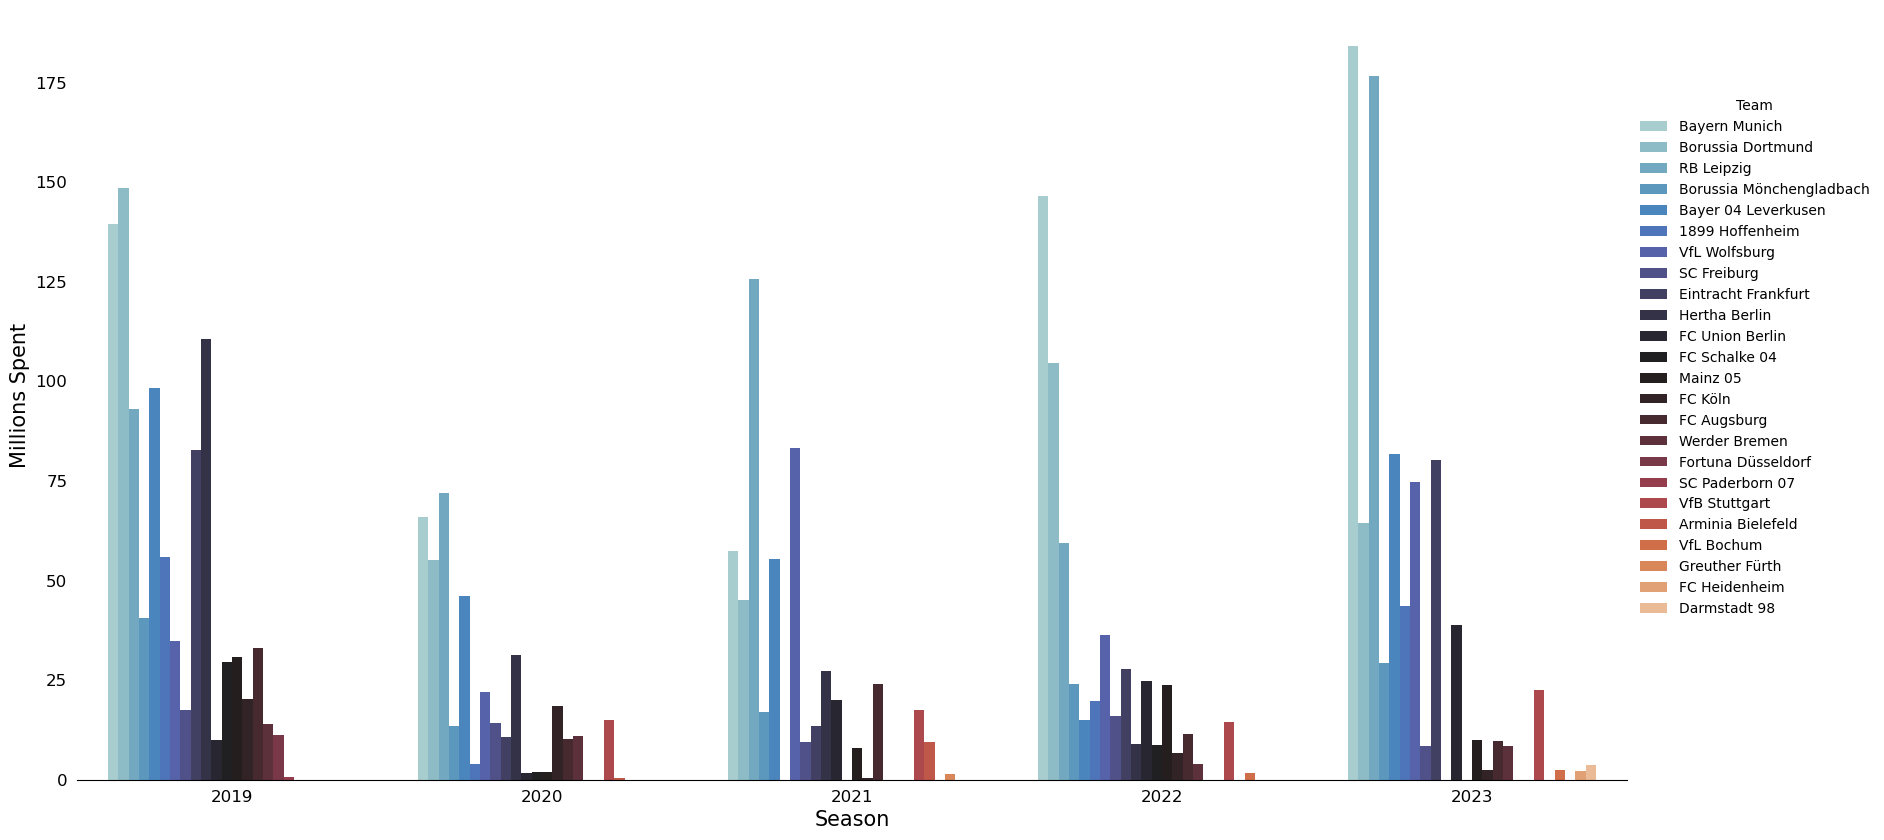

In [1206]:
plt.figure(figsize=(20,10))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=df_team_transfer_data,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9), frameon=False)
plt.show()

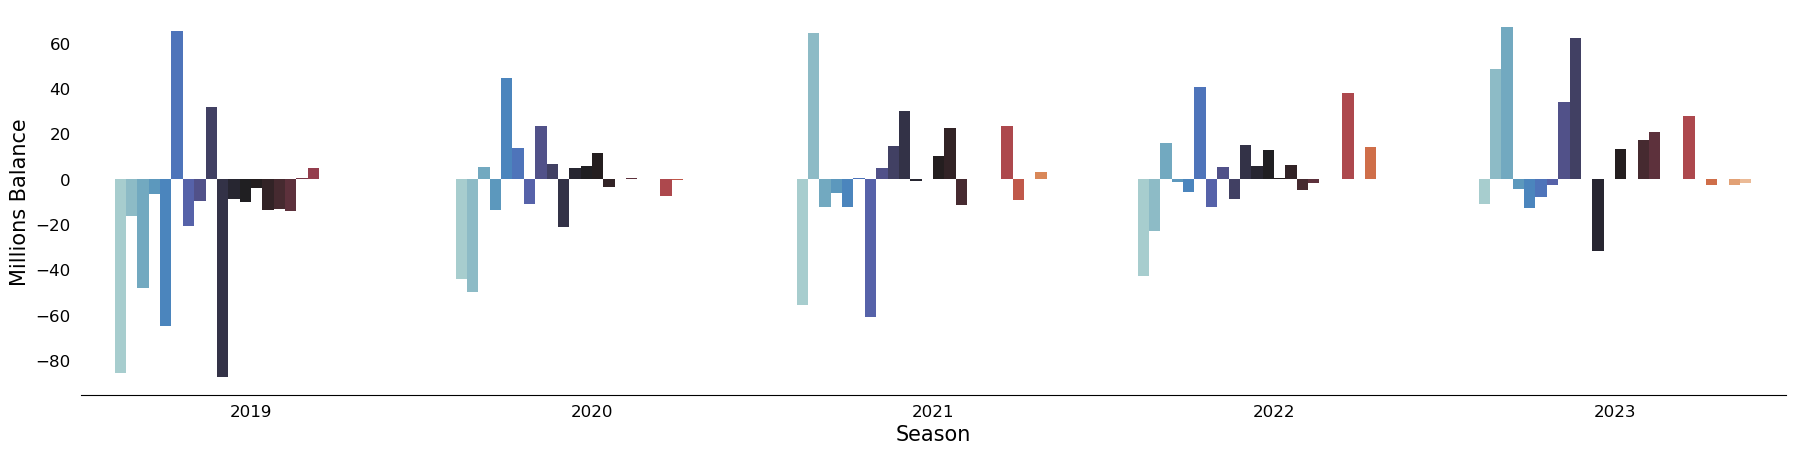

In [1207]:
plt.figure(figsize=(22,5))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=df_team_transfer_data,
    x='season_id',
    y='millions_balance',
    hue='team_name',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Balance',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend().set_visible(False)
plt.show()

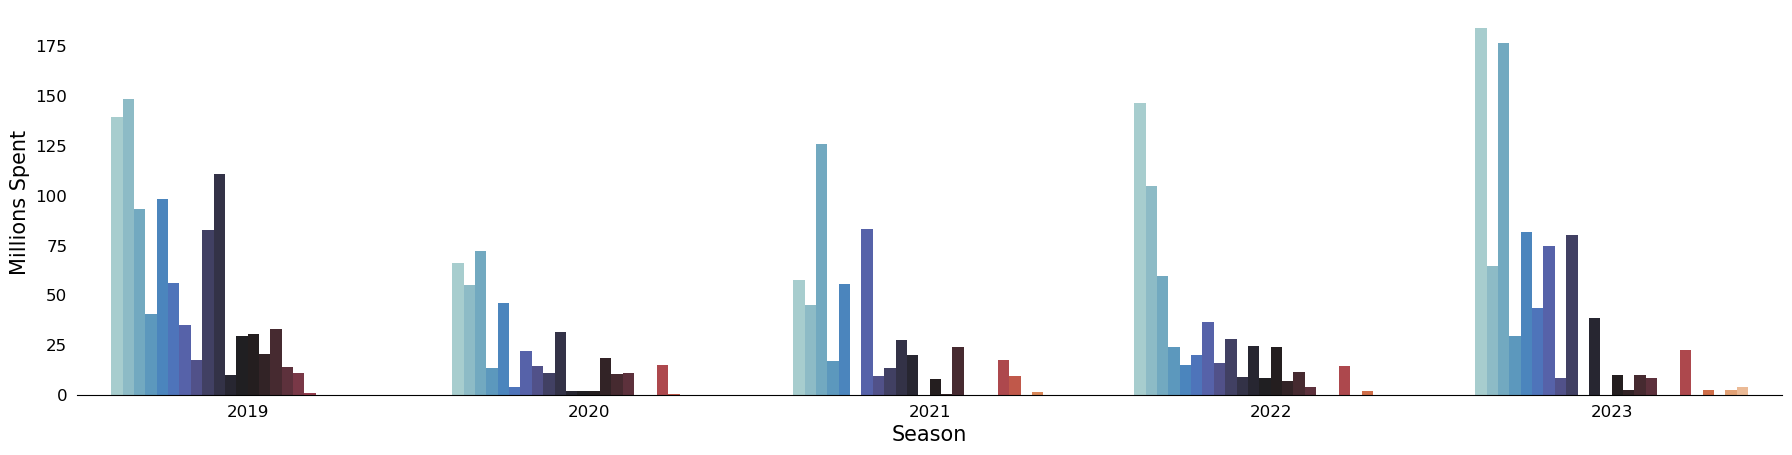

In [1208]:
plt.figure(figsize=(22,5))

my_cmap = sns.color_palette("icefire", n_colors=24)

sns.barplot(
    data=df_team_transfer_data,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=my_cmap
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend().set_visible(False)
plt.show()

### Top 5 that most spend per season

In [1209]:
dfs = {}
for season in unique_seasons:
    dfs[season]= df_team_transfer_data[df_team_transfer_data['season_id']==season].sort_values(by=['millions_spend'], ascending=False).head(5)
dfs[season]
df_top_5_spenders = pd.concat(dfs, ignore_index=True)
df_top_5_spenders

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
0,Borussia Dortmund,2019,2,16,1,6,5,4,16,0,7,4,5,148.50,132.250,-16.250,75.00,58.750
1,Bayern Munich,2019,1,10,0,4,5,1,10,0,4,4,2,139.50,54.000,-85.500,76.50,-9.000
2,Hertha Berlin,2019,10,16,1,2,8,5,16,2,2,9,3,110.70,23.445,-87.255,59.75,-27.505
3,Bayer 04 Leverkusen,2019,5,10,0,4,4,2,9,2,3,3,1,98.20,33.500,-64.700,70.00,5.300
4,RB Leipzig,2019,3,16,1,4,5,6,14,2,3,4,5,93.00,45.250,-47.750,72.00,24.250
5,RB Leipzig,2020,2,13,2,2,3,6,14,2,4,2,6,72.00,77.500,5.500,75.00,80.500
6,Bayern Munich,2020,1,17,2,5,5,5,11,2,2,4,3,66.00,22.250,-43.750,76.50,32.750
7,Borussia Dortmund,2020,3,12,0,5,5,2,8,1,3,3,1,55.15,5.500,-49.650,72.00,22.350
8,Bayer 04 Leverkusen,2020,6,12,1,4,3,4,8,1,2,3,2,46.20,91.000,44.800,67.75,112.550
9,Hertha Berlin,2020,14,16,1,4,4,7,18,2,2,6,8,31.25,10.450,-20.800,46.00,25.200


### Best and worst standing 5

In [1210]:
df_team_transfer_data_best_consistent_5 = df_team_transfer_data[df_team_transfer_data['team_name'].isin(best_consistent_5)]
df_team_transfer_data_worst_consistent_5 = df_team_transfer_data[df_team_transfer_data['team_name'].isin(worst_consistent_5)]

In [1211]:
df_team_transfer_data_best_consistent_5.head()

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
0,Bayern Munich,2019,1,10,0,4,5,1,10,0,4,4,2,139.50,54.00,-85.50,76.5,-9.00
1,Borussia Dortmund,2019,2,16,1,6,5,4,16,0,7,4,5,148.50,132.25,-16.25,75.0,58.75
2,RB Leipzig,2019,3,16,1,4,5,6,14,2,3,4,5,93.00,45.25,-47.75,72.0,24.25
4,Bayer 04 Leverkusen,2019,5,10,0,4,4,2,9,2,3,3,1,98.20,33.50,-64.70,70.0,5.30
10,FC Union Berlin,2019,11,24,4,4,10,6,16,2,6,7,1,10.05,1.25,-8.80,55.0,46.20


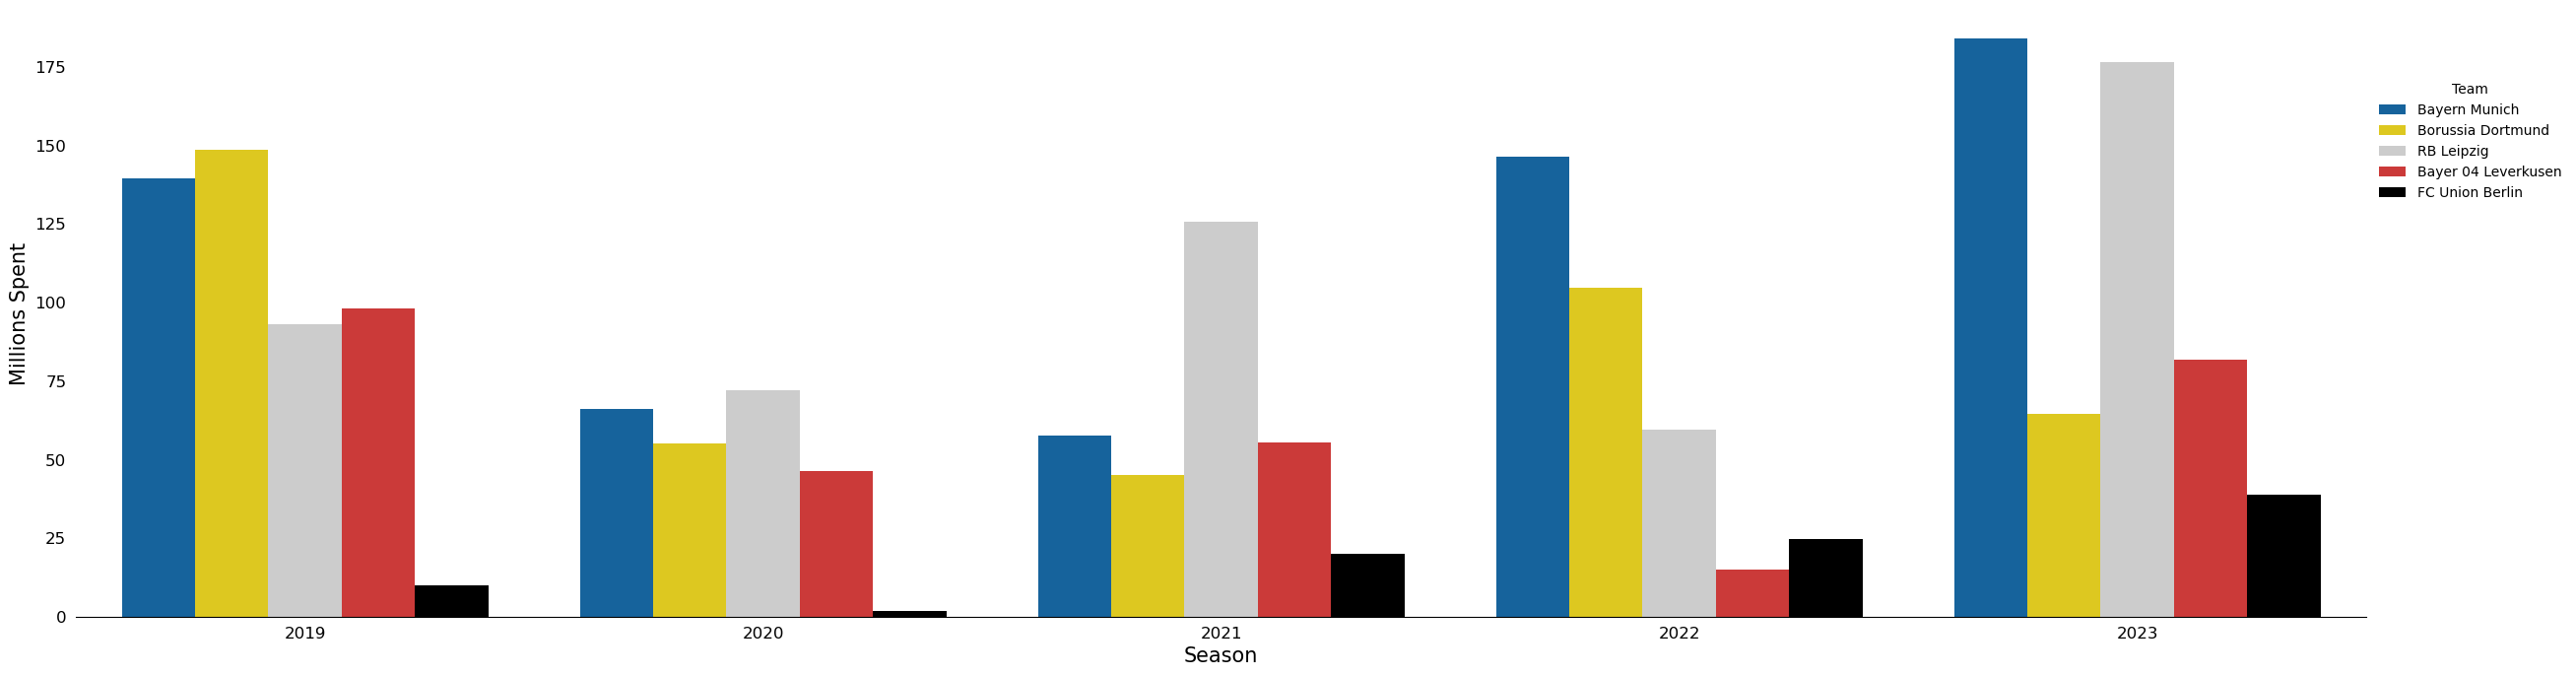

In [1212]:
plt.figure(figsize=(30,8))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=top_5_palette
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1, 0.9), frameon=False)
plt.show()

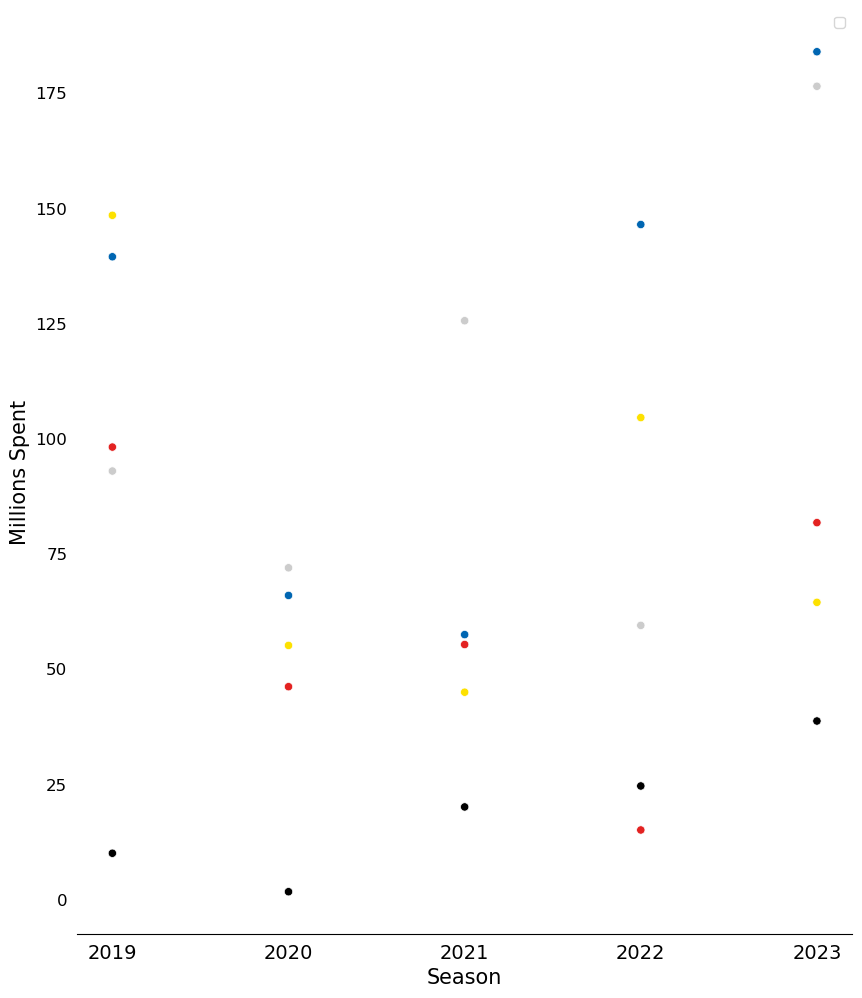

In [1213]:
plt.figure(figsize=(10,12))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

sns.scatterplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=top_5_palette
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([2019, 2020, 2021, 2022, 2023], fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=14)
plt.legend([])

plt.show()

In [1214]:
top_5_palette

['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

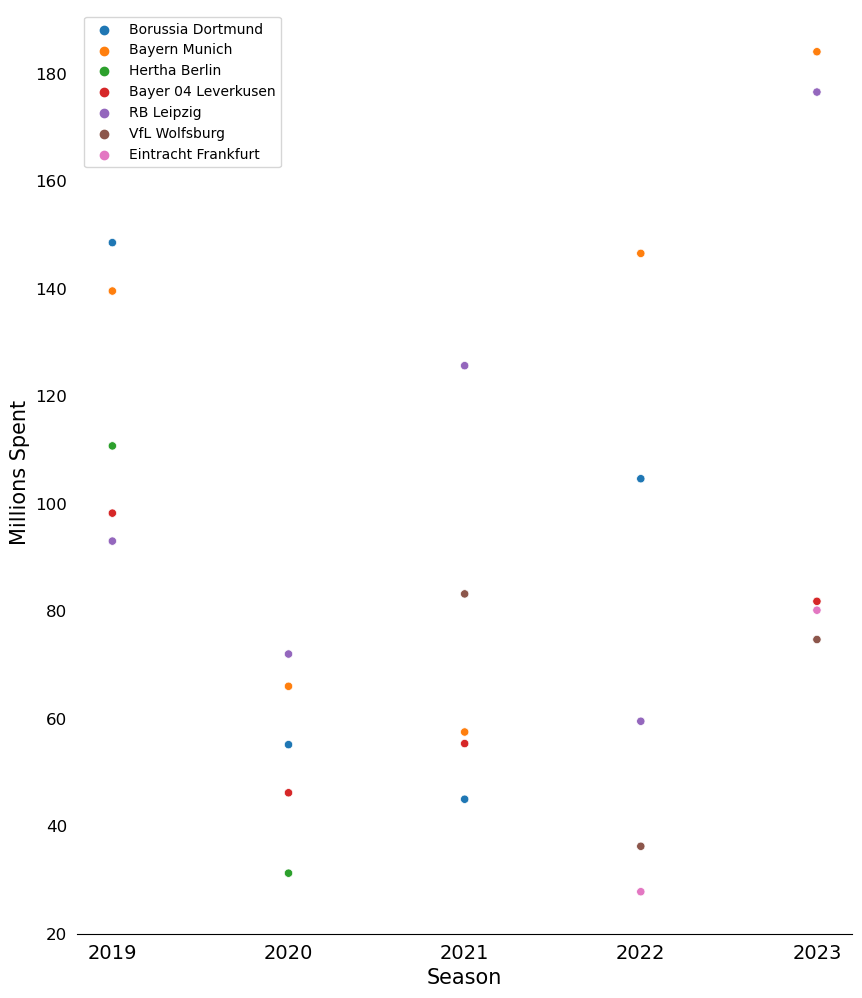

In [1215]:
plt.figure(figsize=(10,12))

# Define custom colors for each category
custom_colors = {
    'Bayern Munich': '#0066B2', 
    'Borussia Dortmund': '#FDE100', 
    'RB Leipzig': '#CCCCCC', 
    'Bayer 04 Leverkusen': '#E32221',
    'Hertha Berlin': '#004D9E',
    'FC Union Berlin': '#000000',
    'VfL Wolfsburg': '#008000'
    }

# Create a list of colors for each bar based on the category
#top_5_palette = [custom_colors[cat] for cat in df_top_5_spenders['team_name']]

sns.scatterplot(
    data=df_top_5_spenders,
    x='season_id',
    y='millions_spend',
    hue='team_name'
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([2019, 2020, 2021, 2022, 2023], fontsize=12)
plt.ylabel('Millions Spent',fontsize=15)
plt.xlabel('Season',fontsize=15)
plt.xticks(fontsize=14)
plt.legend()

plt.show()

Text(0.5, 0, '')

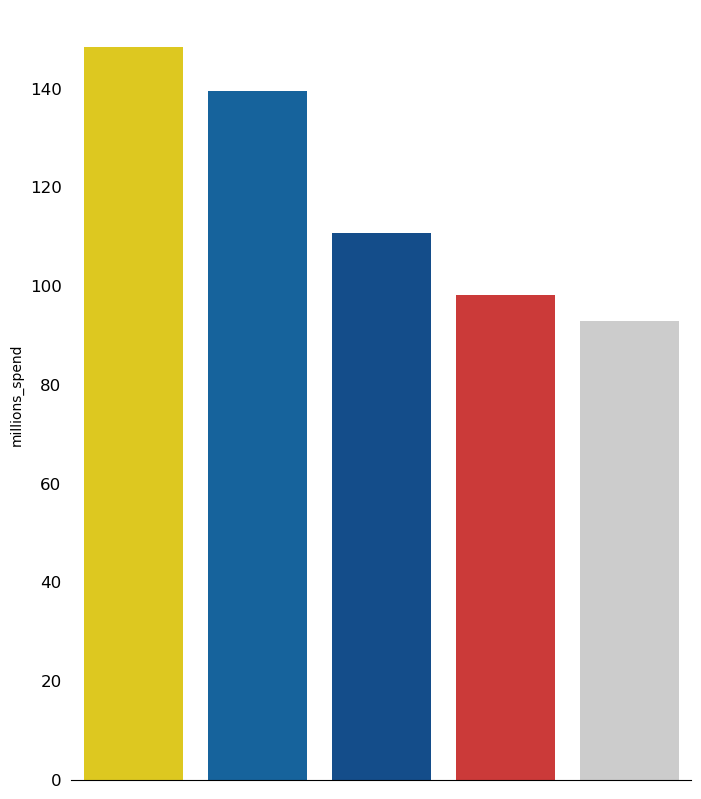

In [1216]:
plt.figure(figsize=(8,10))

top_5_palette = ['#0066B2', '#FDE100', '#CCCCCC', '#E32221', '#000000']

# Define custom colors for each category
custom_colors = {
    'Bayern Munich': '#0066B2', 
    'Borussia Dortmund': '#FDE100', 
    'RB Leipzig': '#CCCCCC', 
    'Bayer 04 Leverkusen': '#E32221',
    'Hertha Berlin': '#004D9E'
    }

# Create a list of colors for each bar based on the category
bar_colors = [custom_colors[cat] for cat in df_top_5_spenders[df_top_5_spenders['season_id']==2019]['team_name']]

sns.barplot(
    data=df_top_5_spenders[df_top_5_spenders['season_id']==2019],
    x='team_name',
    y='millions_spend',
    palette=bar_colors
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.xticks([])
plt.xlabel('')

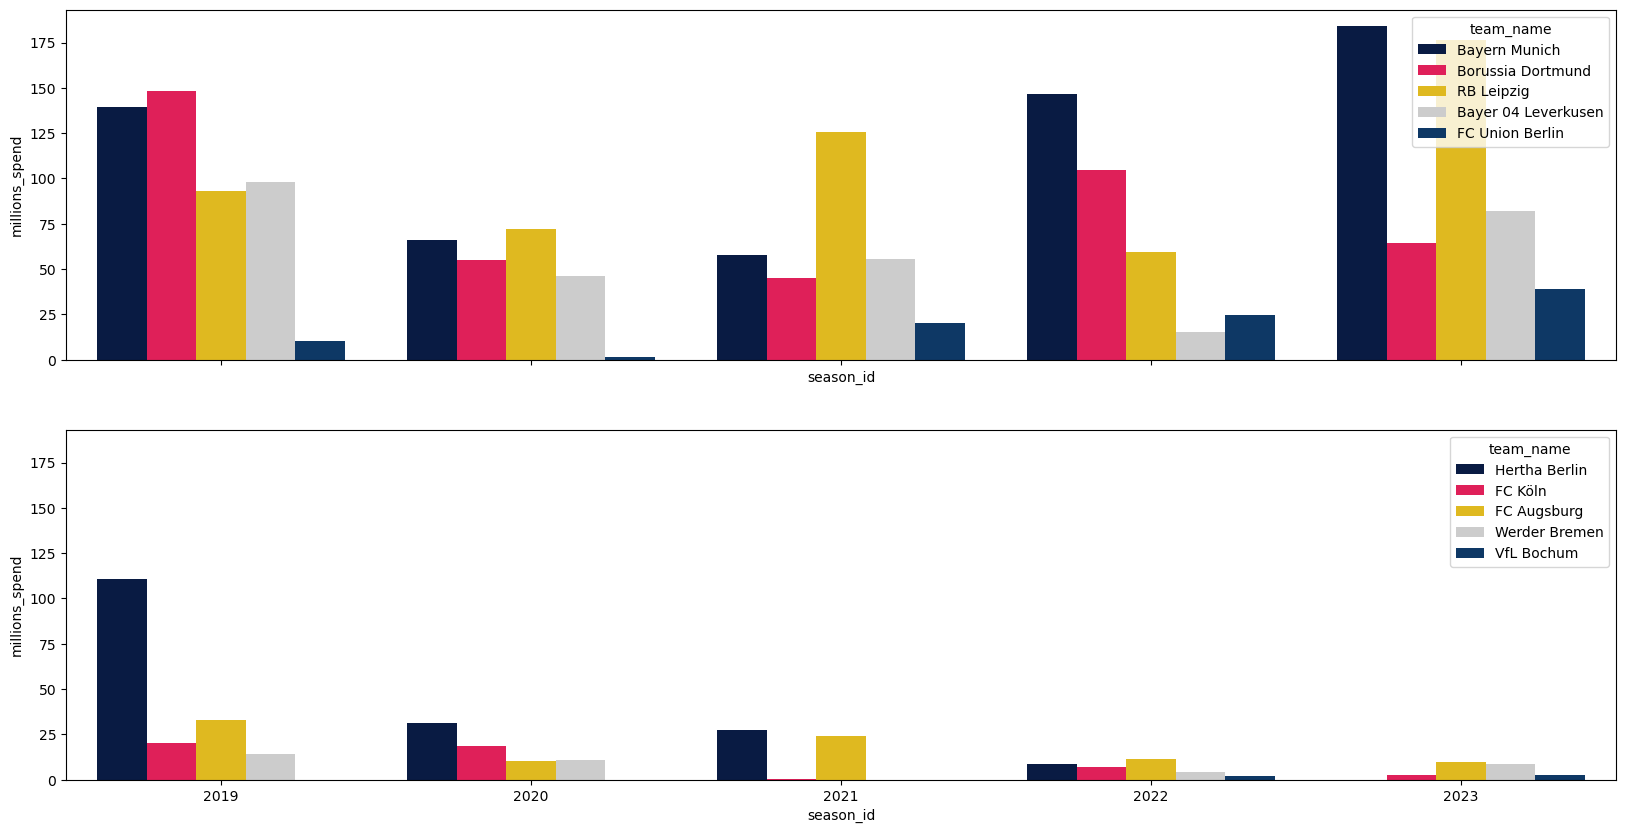

In [1217]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season_id',
    y='millions_spend',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()

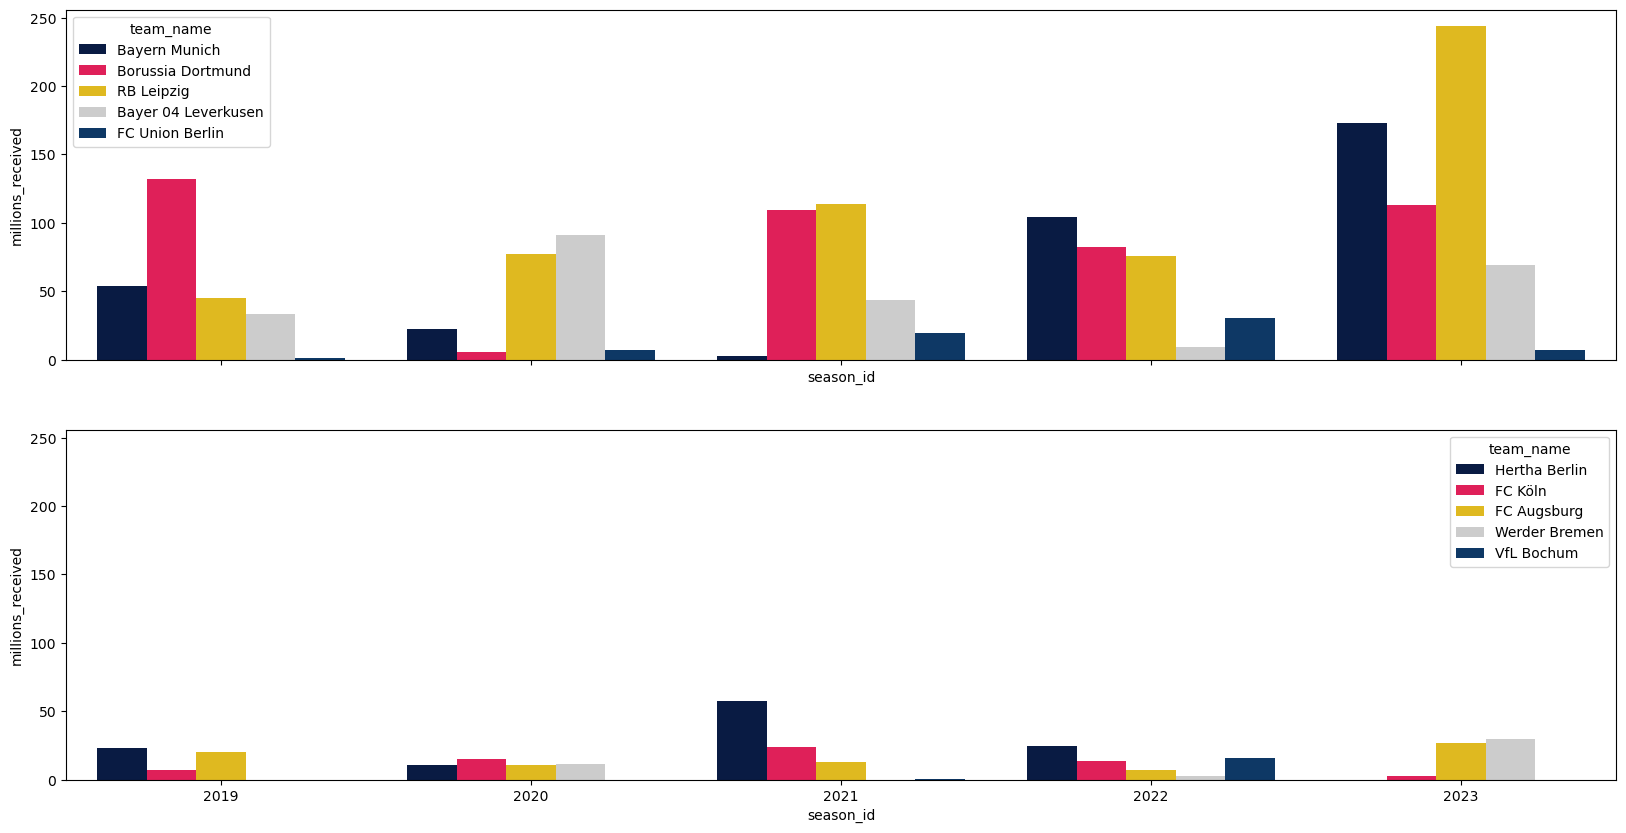

In [1218]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_received',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season_id',
    y='millions_received',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()

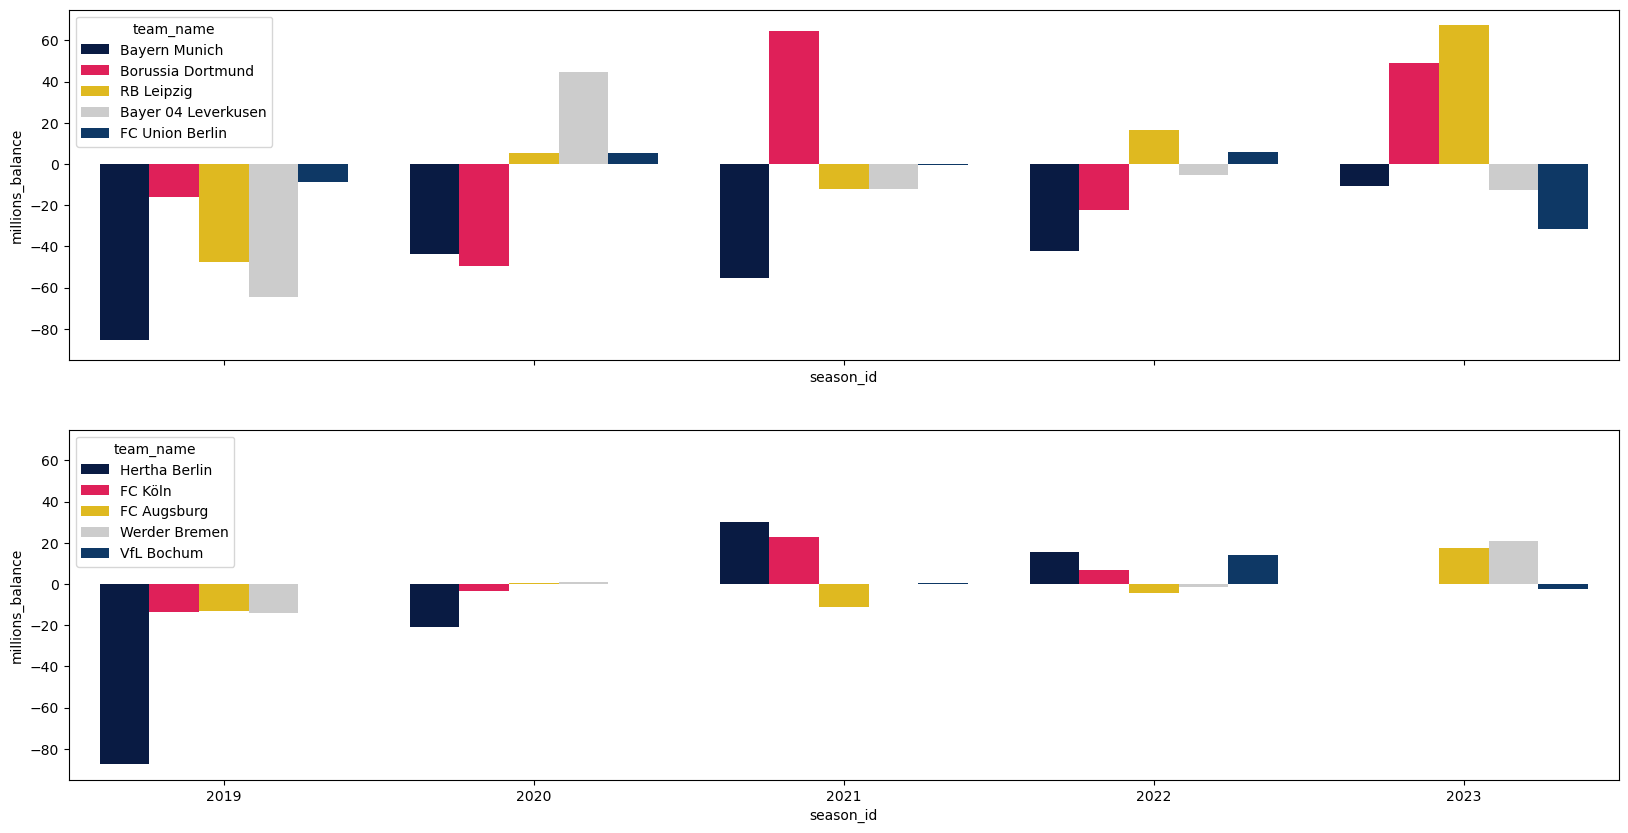

In [1219]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

sns.barplot(
    data=df_team_transfer_data_best_consistent_5,
    x='season_id',
    y='millions_balance',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[0]
)

sns.barplot(
    data=df_team_transfer_data_worst_consistent_5,
    x='season_id',
    y='millions_balance',
    hue='team_name',
    palette=redbull_palette,
    ax = ax[1]
)

plt.show()

### ROI

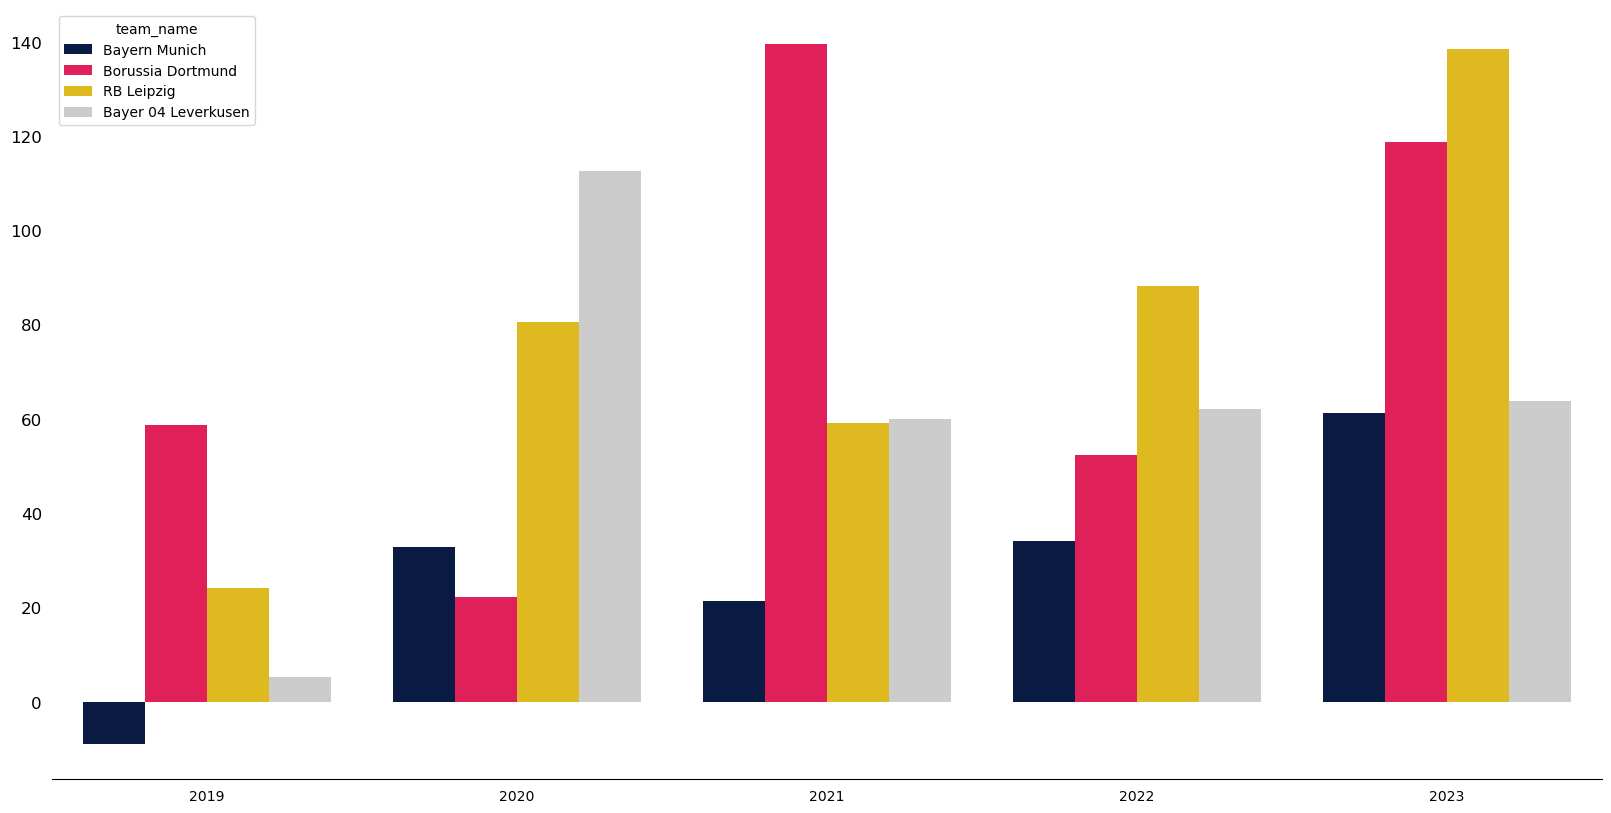

In [1220]:
plt.figure(figsize=(20,10))
sns.barplot(
    data=df_team_transfer_data[df_team_transfer_data['team_name'].isin(['Bayern Munich', 
                                                                        'Borussia Dortmund', 
                                                                        'Bayer 04 Leverkusen', 'RB Leipzig'])],
    x='season_id',
    y='millions_final_balance',
    hue='team_name',
    palette=redbull_palette
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
plt.ylabel('')
plt.xlabel('')
plt.show()

## VfB Stuttgart use case

In [1221]:
transfers_df_clean[(transfers_df_clean['to_club_name']=='VfB Stuttgart') & (transfers_df_clean['season_id']==2023)]

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
2282,4426425,2023-07-01,paid transfer,23/24,2023,282660,Maximilian Mittelstädt,26.0,0.50,2.0,...,left,2024-02-24T15:30:32.921775,left-midfield,left-winger,defense,mid,attack,Germany,NaN,NaN
2306,3910193,2023-07-01,transfer inner downgrade,23/24,2023,800946,Dennis Seimen,17.0,NaN,0.2,...,left,2024-02-26T11:04:29.844048,NaN,NaN,goalkeeper,NaN,NaN,Germany,Romania,NaN
2326,4438606,2023-07-01,paid transfer,23/24,2023,433388,Matej Maglica,24.0,0.45,1.0,...,left,2024-02-25T20:09:40.312297,NaN,NaN,defense,NaN,NaN,Croatia,NaN,NaN
2329,4241559,2023-07-01,paid transfer,23/24,2023,943795,Jovan Milosevic,17.0,1.20,0.5,...,right,2024-02-26T12:51:46.128950,attacking-midfield,central-midfield,attack,mid,mid,Serbia,NaN,NaN
2352,4417791,2023-07-01,paid transfer,23/24,2023,270541,Serhou Guirassy,27.0,9.00,14.0,...,right,2024-02-24T09:04:12.588063,left-winger,NaN,attack,attack,NaN,Guinea,France,NaN
2420,4496024,2023-07-11,paid transfer,23/24,2023,297583,Woo-yeong Jeong,23.0,3.80,3.5,...,right,2024-02-25T13:13:06.591786,right-winger,left-winger,mid,attack,attack,"Korea, South",NaN,NaN
2428,4500405,2023-07-13,paid loan transfer,23/24,2023,518505,Jamie Leweling,22.0,0.20,3.0,...,both,2024-02-25T19:45:19.201961,left-winger,second-striker,attack,attack,attack,Germany,Ghana,NaN
2458,4531444,2023-07-25,paid loan transfer,23/24,2023,195778,Alexander Nübel,26.0,1.00,8.0,...,right,2024-02-24T10:21:33.403810,NaN,NaN,goalkeeper,NaN,NaN,Germany,NaN,NaN
2478,4553643,2023-08-02,paid loan transfer,23/24,2023,339314,Deniz Undav,27.0,0.70,10.0,...,right,2024-02-25T01:10:39.796487,second-striker,attacking-midfield,attack,attack,mid,Germany,Türkiye,NaN
2529,4600674,2023-08-22,paid loan transfer,23/24,2023,507345,Leonidas Stergiou,21.0,0.10,3.0,...,right,2024-02-25T15:23:43.640383,right-back,NaN,defense,defense,NaN,Switzerland,Greece,NaN


In [1222]:
df_team_transfer_data[df_team_transfer_data['team_name']=='VfB Stuttgart']

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
26,VfB Stuttgart,2020,9,12,1,6,4,1,10,0,4,3,3,14.95,7.50,-7.45,60.20,52.75
50,VfB Stuttgart,2021,15,17,2,4,4,7,17,2,7,3,5,17.45,40.92,23.47,43.50,66.97
69,VfB Stuttgart,2022,16,20,0,5,5,10,21,0,3,8,10,14.55,52.60,38.05,41.75,79.80
73,VfB Stuttgart,2023,2,23,2,5,5,11,25,2,7,4,12,22.45,50.65,28.20,75.00,103.20


In [1223]:
standings_df_clean[standings_df_clean['team_name']=='VfB Stuttgart']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
26,9,VfB Stuttgart,17,5,6,6,17,7,3,7,34,12,9,13,56,55,1,45,2020,60.20
50,15,VfB Stuttgart,17,6,4,7,17,1,8,8,34,7,12,15,41,59,-18,33,2021,43.50
69,16,VfB Stuttgart,17,5,6,6,17,2,6,9,34,7,12,15,45,57,-12,33,2022,41.75
73,2,VfB Stuttgart,17,13,3,1,17,10,1,6,34,23,4,7,78,39,39,73,2023,75.00


In [1224]:
df_plot_adq_stuttgart = df_team_transfer_data[df_team_transfer_data['team_name']=='VfB Stuttgart'][['season_id', 'n_adquisitions_goalkeeper', 'n_adquisitions_defense', 'n_adquisitions_mid', 'n_adquisitions_attack']]
df_plot_adq_stuttgart.set_index('season_id', inplace=True)
df_plot_adq_stuttgart = df_plot_adq_stuttgart.iloc[::-1]
df_plot_adq_stuttgart

,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack
season_id,,,,
2023,2,5,5,11
2022,0,5,5,10
2021,2,4,4,7
2020,1,6,4,1


In [1225]:
df_plot_drop_stuttgart = df_team_transfer_data[df_team_transfer_data['team_name']=='VfB Stuttgart'][['season_id', 'n_drops_goalkeeper', 'n_drops_defense', 'n_drops_mid', 'n_drops_attack']]
df_plot_drop_stuttgart.set_index('season_id', inplace=True)
df_plot_drop_stuttgart = df_plot_drop_stuttgart.iloc[::-1]
df_plot_drop_stuttgart

,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack
season_id,,,,
2023,2,7,4,12
2022,0,3,8,10
2021,2,7,3,5
2020,0,4,3,3


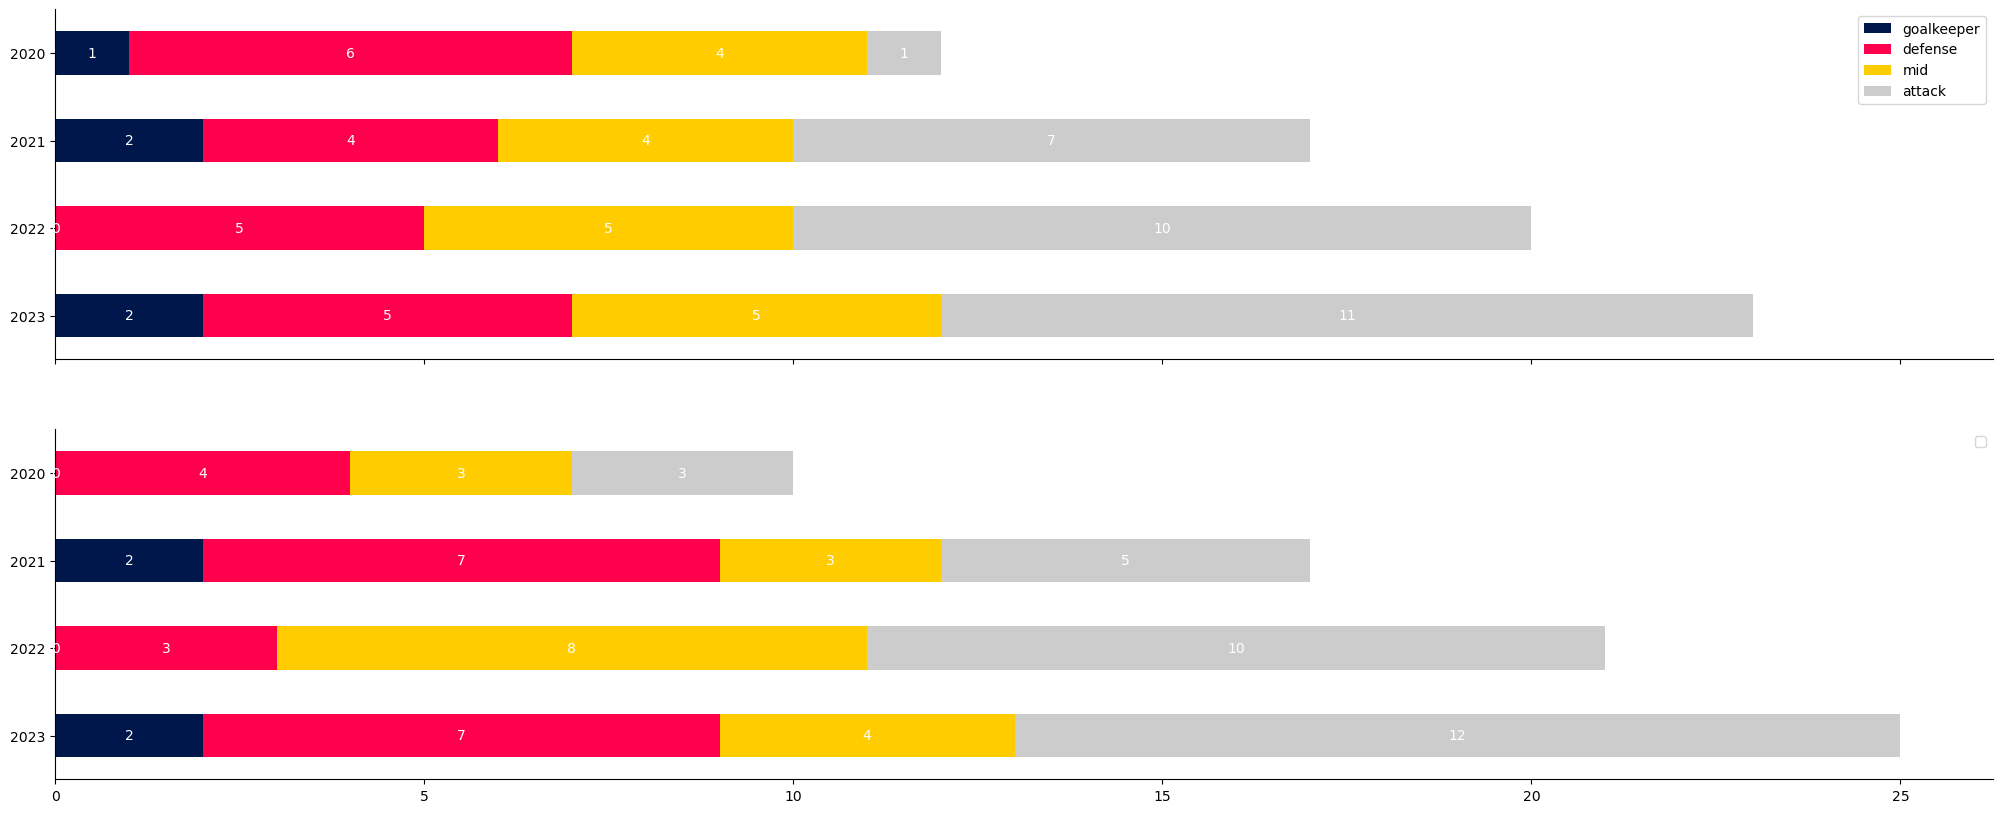

In [1226]:
fig, ax = plt.subplots(2, 1, figsize=(25,10), sharex=True)

df_plot_adq_stuttgart.plot(kind='barh', stacked=True, color=redbull_palette, ax=ax[0])
df_plot_drop_stuttgart.plot(kind='barh', stacked=True, color=redbull_palette, ax=ax[1])

ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].legend(['goalkeeper', 'defense', 'mid', 'attack'])
ax[1].legend('')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

labels_adq = [f'{i}' for i in df_plot_adq_stuttgart.to_numpy().flatten(order='F')]
labels_drop = [f'{i}' for i in df_plot_drop_stuttgart.to_numpy().flatten(order='F')]


for i, patch in enumerate(ax[0].patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax[0].annotate(labels_adq[i], (x, y), ha='center', va='center', c='white')

for i, patch in enumerate(ax[1].patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax[1].annotate(labels_drop[i], (x, y), ha='center', va='center', c='white')

plt.show()

<Axes: xlabel='season_id'>

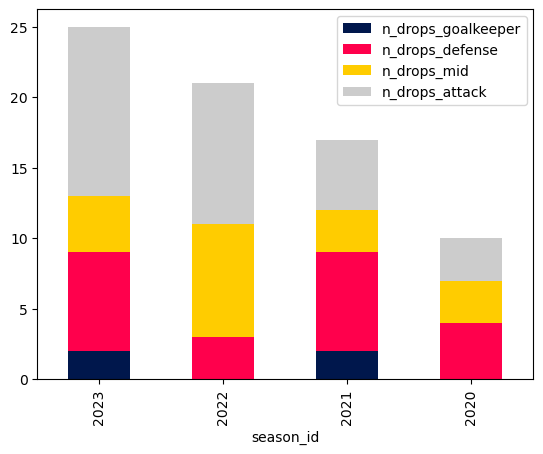

In [1227]:
df_plot_drop_stuttgart.plot(kind='bar', stacked=True, color=redbull_palette)

Text(0.5, 0, '')

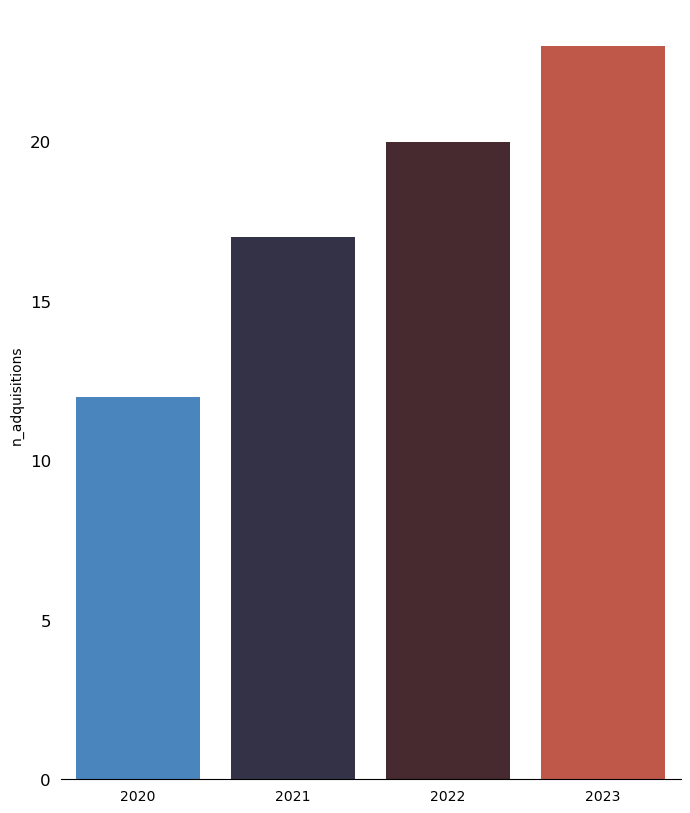

In [1228]:
plt.figure(figsize=(8,10))


# Create a list of colors for each bar based on the category
bar_colors = [custom_colors[cat] for cat in df_top_5_spenders[df_top_5_spenders['season_id']==2019]['team_name']]

sns.barplot(
    data=df_team_transfer_data[df_team_transfer_data['team_name']=='VfB Stuttgart'],
    x='season_id',
    y='n_adquisitions',
    palette='icefire'
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.tick_params(bottom = False, left = False) 
plt.yticks(fontsize=12)
#plt.xticks([])
plt.xlabel('')

## Leverkusen use case

In [1229]:
transfers_df_clean[(transfers_df_clean['to_club_name']=='Bayer 04 Leverkusen') & (transfers_df_clean['season_id']==2023)]

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
2267,4349428,2023-07-01,paid transfer,23/24,2023,977464,Arthur,20.0,7.0,5.0,...,right,2024-02-26T04:24:00.589304,left-back,right-midfield,defense,defense,mid,Brazil,NaN,NaN
2299,4399343,2023-07-01,free transfer,23/24,2023,193082,Alejandro Grimaldo,27.0,0.0,25.0,...,left,2024-02-24T07:57:28.253760,left-midfield,NaN,defense,mid,NaN,Spain,NaN,NaN
2369,4414186,2023-07-01,transfer inner downgrade,23/24,2023,696027,Ayman Aourir,18.0,NaN,NaN,...,both,2024-02-26T12:14:36.933134,central-midfield,NaN,mid,mid,NaN,Morocco,Germany,NaN
2394,4480360,2023-07-05,paid transfer,23/24,2023,7161,Jonas Hofmann,30.0,10.0,13.0,...,right,2024-02-24T08:10:10.620982,central-midfield,right-winger,mid,mid,attack,Germany,NaN,NaN
2399,4483523,2023-07-06,paid transfer,23/24,2023,111455,Granit Xhaka,30.0,15.0,20.0,...,left,2024-02-24T21:39:07.441799,central-midfield,NaN,mid,mid,NaN,Switzerland,NaN,NaN
2448,4525081,2023-07-22,paid transfer,23/24,2023,656681,Victor Boniface,22.0,20.5,12.0,...,right,2024-02-25T15:00:01.128726,NaN,NaN,attack,NaN,NaN,Nigeria,NaN,NaN
2509,4583975,2023-08-15,paid transfer,23/24,2023,550829,Matej Kovar,23.0,5.0,1.8,...,right,2024-02-25T11:18:12.000178,NaN,NaN,goalkeeper,NaN,NaN,Czech Republic,NaN,NaN
2524,4596024,2023-08-20,free loan transfer,23/24,2023,483046,Josip Stanisic,23.0,NaN,12.0,...,both,2024-02-25T18:29:38.213721,right-back,left-back,defense,defense,defense,Croatia,Germany,NaN
2538,4610009,2023-08-27,paid transfer,23/24,2023,340322,Nathan Tella,24.0,23.3,18.0,...,right,2024-02-25T06:01:32.611529,left-winger,second-striker,attack,attack,attack,Nigeria,England,NaN
2661,4851015,2024-01-27,paid loan transfer,23/24,2023,278359,Borja Iglesias,31.0,1.0,8.0,...,right,2024-02-24T23:32:08.104979,NaN,NaN,attack,NaN,NaN,Spain,NaN,NaN


In [1230]:
df_plot_adq_leverkusen = df_team_transfer_data[df_team_transfer_data['team_name']=='Bayer 04 Leverkusen'][['season_id', 'n_adquisitions_goalkeeper', 'n_adquisitions_defense', 'n_adquisitions_mid', 'n_adquisitions_attack']]
df_plot_adq_leverkusen.set_index('season_id', inplace=True)
df_plot_adq_leverkusen = df_plot_adq_leverkusen.iloc[::-1]
df_plot_adq_leverkusen

,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack
season_id,,,,
2023,2,4,3,4
2022,2,2,4,3
2021,2,3,5,3
2020,1,4,3,4
2019,0,4,4,2


In [1231]:
df_plot_drop_leverkusen = df_team_transfer_data[df_team_transfer_data['team_name']=='Bayer 04 Leverkusen'][['season_id', 'n_drops_goalkeeper', 'n_drops_defense', 'n_drops_mid', 'n_drops_attack']]
df_plot_drop_leverkusen.set_index('season_id', inplace=True)
df_plot_drop_leverkusen = df_plot_drop_leverkusen.iloc[::-1]
df_plot_drop_leverkusen

,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack
season_id,,,,
2023,3,3,5,5
2022,1,2,4,4
2021,1,5,4,4
2020,1,2,3,2
2019,2,3,3,1


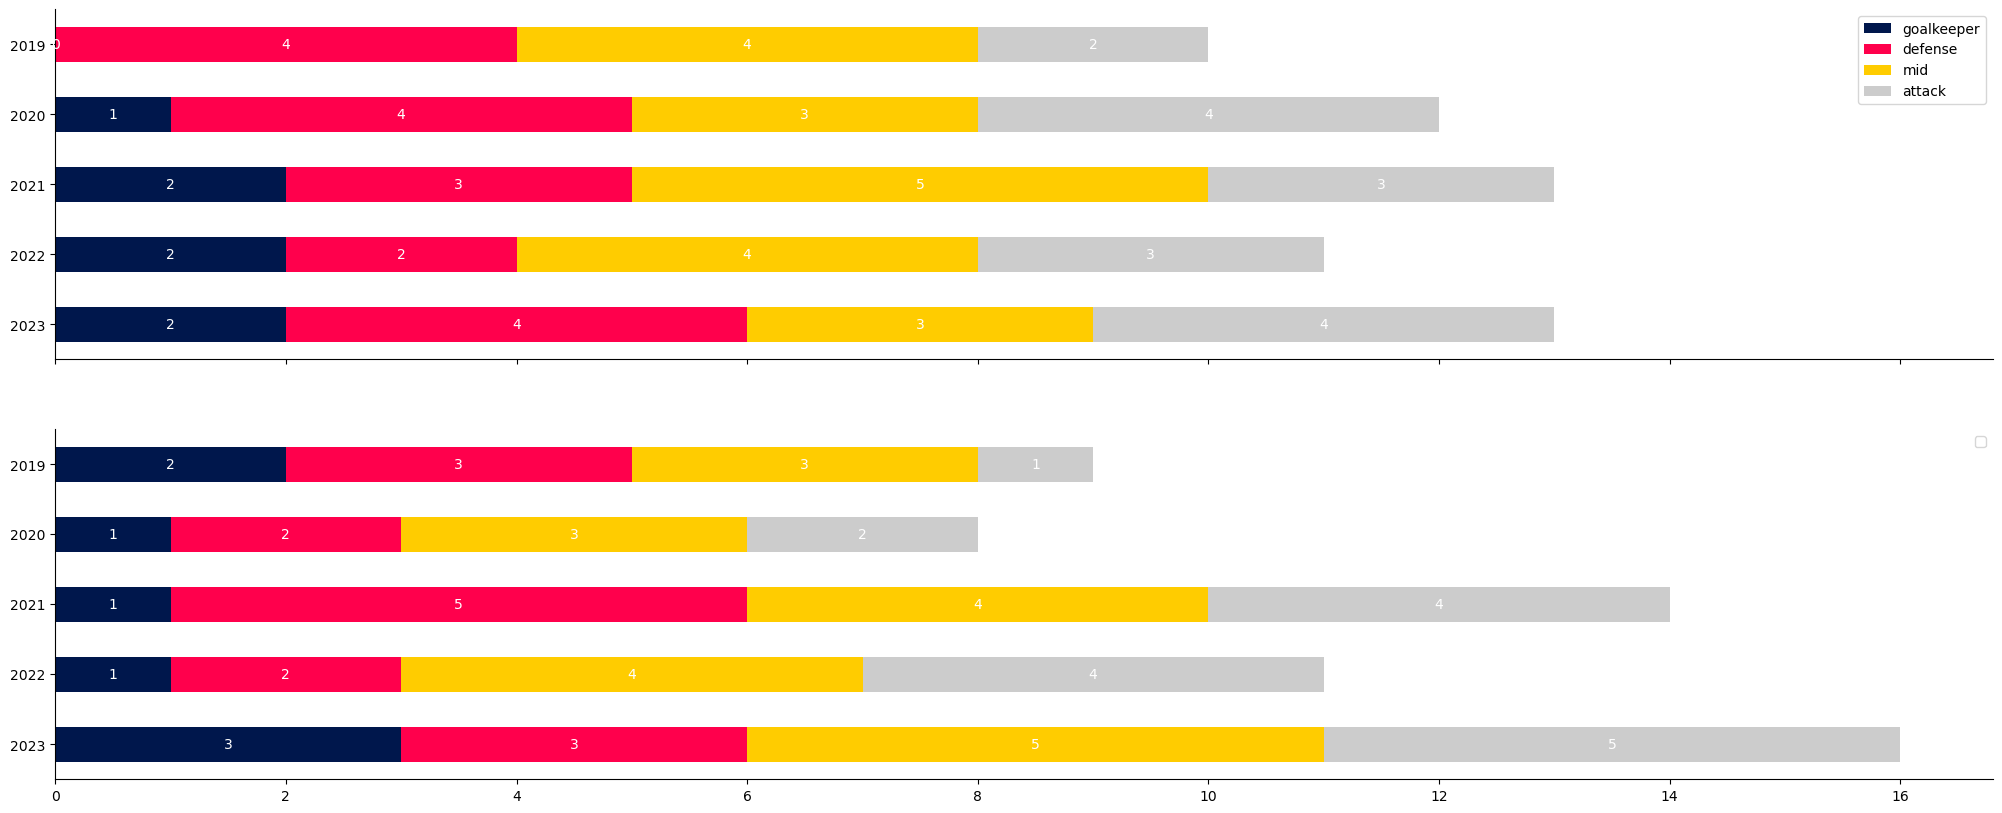

In [1232]:
fig, ax = plt.subplots(2, 1, figsize=(25,10), sharex=True)

df_plot_adq_leverkusen.plot(kind='barh', stacked=True, color=redbull_palette, ax=ax[0])
df_plot_drop_leverkusen.plot(kind='barh', stacked=True, color=redbull_palette, ax=ax[1])

ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].legend(['goalkeeper', 'defense', 'mid', 'attack'])
ax[1].legend('')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

labels_adq = [f'{i}' for i in df_plot_adq_leverkusen.to_numpy().flatten(order='F')]
labels_drop = [f'{i}' for i in df_plot_drop_leverkusen.to_numpy().flatten(order='F')]


for i, patch in enumerate(ax[0].patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax[0].annotate(labels_adq[i], (x, y), ha='center', va='center', c='white')

for i, patch in enumerate(ax[1].patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax[1].annotate(labels_drop[i], (x, y), ha='center', va='center', c='white')

plt.show()

## Star players

In [1233]:
transfers_df_clean[(transfers_df_clean['market_value_million']>40) & (transfers_df_clean['to_competition_id']=='L1')]

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
160,2438348,2019-07-01,paid transfer,19/20,2019,281963,Lucas Hernández,23.0,80.00,70.0,...,left,2024-02-24T15:44:41.434723,centre-back,NaN,defense,defense,NaN,France,Spain,NaN
161,2482926,2019-07-01,paid transfer,19/20,2019,187492,Julian Brandt,23.0,25.00,50.0,...,right,2024-02-24T20:09:12.809634,right-winger,left-winger,mid,attack,attack,Germany,NaN,NaN
170,2453658,2019-07-01,paid transfer,19/20,2019,257462,Luka Jović,21.0,22.34,60.0,...,right,2024-02-24T07:57:44.257171,NaN,NaN,attack,NaN,NaN,Serbia,Bosnia-Herzegovina,NaN
279,2612612,2019-08-19,paid loan transfer,19/20,2019,80444,Philippe Coutinho,27.0,8.50,90.0,...,right,2024-02-24T16:18:00.868378,left-winger,right-winger,mid,attack,attack,Brazil,Portugal,NaN
340,2737490,2020-01-01,paid transfer,19/20,2019,418560,Erling Haaland,19.0,20.00,45.0,...,left,2024-02-25T03:53:22.879307,NaN,NaN,attack,NaN,NaN,Norway,NaN,NaN
625,2954050,2020-07-15,paid transfer,20/21,2020,192565,Leroy Sané,24.0,49.00,80.0,...,left,2024-02-24T10:22:01.462066,left-winger,attacking-midfield,attack,attack,mid,Germany,France,NaN
1216,3420383,2021-07-02,paid transfer,21/22,2021,198008,André Silva,25.0,23.00,45.0,...,right,2024-02-24T19:53:51.302477,NaN,NaN,attack,NaN,NaN,Portugal,NaN,NaN
1225,3252783,2021-07-05,paid transfer,21/22,2021,344695,Dayot Upamecano,22.0,42.50,60.0,...,right,2024-02-24T15:12:37.610639,NaN,NaN,defense,NaN,NaN,France,Guinea-Bissau,NaN
1343,3526269,2021-08-30,paid transfer,21/22,2021,106987,Marcel Sabitzer,27.0,15.00,42.0,...,right,2024-02-24T07:05:59.129084,attacking-midfield,NaN,mid,mid,NaN,Austria,NaN,NaN
1761,3897812,2022-07-01,paid transfer,22/23,2022,200512,Sadio Mané,30.0,32.00,70.0,...,right,2024-02-24T23:39:20.716310,right-winger,centre-forward,attack,attack,attack,Senegal,NaN,NaN


In [1234]:
transfers_df_clean[(transfers_df_clean['market_value_million']>40) & (transfers_df_clean['to_competition_id']=='L1')]['to_club_name']

160           Bayern Munich
161       Borussia Dortmund
170     Eintracht Frankfurt
279           Bayern Munich
340       Borussia Dortmund
625           Bayern Munich
1216             RB Leipzig
1225          Bayern Munich
1343          Bayern Munich
1761          Bayern Munich
1849          Bayern Munich
2075          Bayern Munich
2436          Bayern Munich
2503          Bayern Munich
Name: to_club_name, dtype: object

In [1235]:
transfers_df_clean[transfers_df_clean['player_name']=='Luka Jović']

,transfer_id,transfer_datetime,transfer_type,season,season_id,player_id,player_name,player_age_at_transfer,transfer_fee_million,market_value_million,...,foot,updated_at,extra_position_1,extra_position_2,position_main_segment,extra_position_1_segment,extra_position_2_segment,citizenship_1,citizenship_2,citizenship_3
170,2453658,2019-07-01,paid transfer,19/20,2019,257462,Luka Jović,21.0,22.34,60.0,...,right,2024-02-24T07:57:44.257171,NaN,NaN,attack,NaN,NaN,Serbia,Bosnia-Herzegovina,NaN
184,2494625,2019-07-02,paid transfer,19/20,2019,257462,Luka Jović,21.0,63.00,60.0,...,right,2024-02-24T07:57:44.257171,NaN,NaN,attack,NaN,NaN,Serbia,Bosnia-Herzegovina,NaN
880,3204617,2021-01-14,paid loan transfer,20/21,2020,257462,Luka Jović,23.0,1.00,20.0,...,right,2024-02-24T07:57:44.257171,NaN,NaN,attack,NaN,NaN,Serbia,Bosnia-Herzegovina,NaN
989,3204618,2021-06-30,end of loan,20/21,2020,257462,Luka Jović,23.0,NaN,20.0,...,right,2024-02-24T07:57:44.257171,NaN,NaN,attack,NaN,NaN,Serbia,Bosnia-Herzegovina,NaN


In [1236]:
transfers_df_clean[transfers_df_clean['player_name']=='Luka Jović']['to_club_name']

170    Eintracht Frankfurt
184            Real Madrid
880    Eintracht Frankfurt
989            Real Madrid
Name: to_club_name, dtype: object

In [1237]:
df_team_transfer_data[df_team_transfer_data['team_name']=='Eintracht Frankfurt']

,team_name,season_id,final_standing,n_adquisitions,n_adquisitions_goalkeeper,n_adquisitions_defense,n_adquisitions_mid,n_adquisitions_attack,n_drops,n_drops_goalkeeper,n_drops_defense,n_drops_mid,n_drops_attack,millions_spend,millions_received,millions_balance,millions_final_standing,millions_final_balance
8,Eintracht Frankfurt,2019,9,19,1,5,8,5,21,1,7,5,8,82.64,114.8,32.16,60.20,92.36
22,Eintracht Frankfurt,2020,5,21,3,4,5,9,24,4,4,10,6,10.75,17.7,6.95,70.00,76.95
46,Eintracht Frankfurt,2021,11,23,3,3,5,12,21,2,4,5,10,13.45,28.4,14.95,55.00,69.95
60,Eintracht Frankfurt,2022,7,22,1,6,6,9,25,1,7,8,9,27.80,19.4,-8.40,65.60,57.20
77,Eintracht Frankfurt,2023,6,36,1,13,11,11,27,1,8,7,11,80.15,142.5,62.35,67.75,130.10


In [1238]:
standings_df_clean[standings_df_clean['team_name']=='Eintracht Frankfurt']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
8,9,Eintracht Frankfurt,17,8,4,5,17,5,2,10,34,13,6,15,59,60,-1,45,2019,60.20
22,5,Eintracht Frankfurt,17,10,7,0,17,6,5,6,34,16,12,6,69,53,16,60,2020,70.00
46,11,Eintracht Frankfurt,17,4,7,6,17,6,5,6,34,10,12,12,45,49,-4,42,2021,55.00
60,7,Eintracht Frankfurt,17,9,5,3,17,4,6,7,34,13,11,10,58,52,6,50,2022,65.60
77,6,Eintracht Frankfurt,17,7,8,2,17,4,6,7,34,11,14,9,51,50,1,47,2023,67.75


In [1239]:
standings_df_clean[standings_df_clean['team_name']=='Borussia Dortmund']

,final_standing,team_name,home_played,home_wins,home_draws,home_losses,away_played,away_wins,away_draws,away_losses,total_played,total_wins,total_draws,total_losses,goals_in_favor,goals_against,goals_balance,points,season_id,final_standing_earnings
1,2,Borussia Dortmund,17,11,3,3,17,10,3,4,34,21,6,7,84,41,43,69,2019,75.0
20,3,Borussia Dortmund,17,11,2,4,17,9,2,6,34,20,4,10,75,46,29,64,2020,72.0
37,2,Borussia Dortmund,17,13,0,4,17,9,3,5,34,22,3,9,85,52,33,69,2021,75.0
55,2,Borussia Dortmund,17,14,2,1,17,8,3,6,34,22,5,7,83,44,39,71,2022,75.0
76,5,Borussia Dortmund,17,10,3,4,17,8,6,3,34,18,9,7,68,43,25,63,2023,70.0
